# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [3]:
pd.set_option('display.max_columns',None)#set to display all columns

In [6]:
warnings.filterwarnings('ignore')#ignore warnings

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
directory_path='D:/Sreekaran/python/EDA2/NYC taxi/Datasets and Dictionary/trip_records'
os.chdir(directory_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

sampled_data_list=[]

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        data=pd.read_parquet(file_path)
        data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
        data['date'] = data['tpep_pickup_datetime'].dt.date  # Extract date part
        data['hour'] = data['tpep_pickup_datetime'].dt.hour  # Extract hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()
        file_sampled_data = []
        # Loop through dates and then loop through every hour of each date
        for date in data['date'].unique():
            daily_data=data[data['date']==date]
            # Iterate through each hour of the selected date
            for hour in daily_data['hour'].unique():
                hourly_data=daily_data[daily_data['hour']==hour]
                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                file_sampled_data.append(sampled_hourly_data)
        # Concatenate the sampled data of all the dates to a single dataframe
        file_sampled_data = pd.concat(file_sampled_data, ignore_index=True)
        sampled_data_list.append(file_sampled_data)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
final_sampled_data1 = pd.concat(sampled_data_list, ignore_index=True)
final_sampled_data1.to_parquet('sampled_taxi_data.parquet', index=False)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [27]:
# Load the new data file
df_1=pd.read_parquet('sampled_taxi_data.parquet')

In [28]:
df_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [30]:
# Fix the index and drop any columns that are not needed
# Correcting index
df_1.reset_index(drop=True,inplace=True)
# Extras is a field which doesnot give any value to analysis which can be removed
df_1=df_1.drop(columns=['extra'])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [31]:
# Combine the two airport fee columns
#will combine airport fee columns to "Airport__Fee" Coulumn
df_1['Airport__Fee'] = df_1['airport_fee'].combine_first(df_1['Airport_fee'])

In [33]:
#Now that new column for airport fee in place I can drop the old columns
df_1=df_1.drop(columns=['airport_fee','Airport_fee'])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [37]:
# check where values of fare amount are negative
# Find which columns have negative values
columns_with_numeric=df_1.select_dtypes(exclude=['object','datetime64']).columns
columns_with_neg_values=columns_with_numeric[(df_1[columns_with_numeric] < 0).any()].tolist()
print("Columns with negative values : \n", columns_with_neg_values)

Columns with negative values : 
 ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport__Fee']


In [39]:
# fix these negative values
# 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport__Fee' are the columns were -ve values present
#lets count no of -ve values these columns have
for c in columns_with_neg_values :
  print("no of -ve values in column "+c+" : "+str(df_1[df_1[c]<0].shape[0]))

no of -ve values in column mta_tax : 73
no of -ve values in column improvement_surcharge : 78
no of -ve values in column total_amount : 78
no of -ve values in column congestion_surcharge : 56
no of -ve values in column Airport__Fee : 15


In [41]:
#airport_fee , congestion_surcharge, mta_tax , total amount , improvment charge all 
#these -ve values will be because of some technical or entry error - we can remove it
# lets remove the rows with -ve values on all the above column
for colm in columns_with_neg_values :
  df_1=df_1[~(df_1[colm]<0)]

Did you notice something different in the `RatecodeID` column for above records?

In [43]:
# Analyse RatecodeID for the negative fare amounts
df_1[df_1['RatecodeID']<0].shape[0]

0

In [44]:
# there are no -ve values for RatecodeID
# lets check max and min value in RatecodeID
print("maximum value for RatecodeID :"+str(df_1['RatecodeID'].max())+"\n Minimum value for RatecodeID :"+str(df_1['RatecodeID'].min()))

maximum value for RatecodeID :99.0
 Minimum value for RatecodeID :1.0


In [53]:
#as per the data dictionory RatecodeID can have any of the following values (1,2,3,4,5,6)
# first of we can convert the column to int
#df_1['RatecodeID'].astype(int) --that means there are null values for RatecodeID
# lets check null value in Ratecode id 
print("no of rows for column RatecodeID is having null value : "+str(df_1[df_1['RatecodeID'].isnull()].shape[0]))

no of rows for column RatecodeID is having null value : 64874


In [57]:
# as 64874 rows is just 3% of the data set df_1 we can remove this rows from the df_1
df_1=df_1[~(df_1['RatecodeID'].isnull())]

In [59]:
# now I can make RatecodeID as integer
df_1['RatecodeID']=df_1['RatecodeID'].astype(int)

In [49]:
# Find which columns have negative values
numeric_columns=df_1.select_dtypes(exclude=['datetime64','object']).columns
negative_value_columns=numeric_columns[(df_1[numeric_columns]<0).any()].tolist()
print(negative_value_columns)

[]


In [ ]:
# that means there are no  numeric columns with -ve value remaining

In [50]:
# fix these negative values ---- no columns remaining wiht -ve values as below 
numeric_columns=df_1.select_dtypes(exclude=['datetime64','object']).columns
negative_value_columns=numeric_columns[(df_1[numeric_columns]<0).any()].tolist()
print(negative_value_columns)


[]


In [60]:
# let us see the count of rows after the first session 
df_1.shape[0]

1831448

In [61]:
#before moving to next session I will save this parquet
df_1.to_parquet('df_1.parquet', index=False)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [63]:
# Find the proportion of missing values in each column
print('Number of null values in  each column : \n\n' +str((df_1.isnull().mean()*100)))


Number of null values in  each column : 

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
date                     0.0
hour                     0.0
Airport__Fee             0.0
dtype: float64


In [ ]:
# this shows no columns are having null value

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [65]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
#now of rows with null values for column 'passenger_count' 
print('number of rows with null value for column passenger_count :   '+str(df_1[df_1['passenger_count'].isnull()].shape[0]))

number of rows with null value for column passenger_count :   0


In [67]:
# this shows that there is no rows with passenger value null

Did you find zeroes in passenger_count? Handle these.

In [68]:
# but lets check how rows are having passenger value 0 
print('number of rows with  value 0 for column passenger_count :   '+str(df_1[df_1['passenger_count']==0].shape[0]))

number of rows with  value 0 for column passenger_count :   29681


In [72]:
# lets also check what is the total amount received for passenger count 0 , lets display head()
df_1[df_1['passenger_count']==0][['passenger_count','total_amount']]

,passenger_count,total_amount
118,0.0,15.00
192,0.0,34.50
197,0.0,20.00
234,0.0,16.50
235,0.0,13.80
...,...,...
1896048,0.0,59.15
1896148,0.0,26.40
1896244,0.0,24.70
1896309,0.0,13.80


In [82]:
print("number of rows in dataset : "+str(df_1.shape[0]))

number of rows in dataset : 1831448


In [ ]:
# so rows with passenger count 0 is 1.6 percentage hence we can  remove this data from analysis rather than subtituting values with mean or median

In [85]:
# seems this is a maual error and there is some payment received for each of these trip, lets remove this improper data we are not sure this is correct or not 
#lets take it to df_2
df_2=df_1[~(df_1['passenger_count']==0)]
df_2.shape[0]

1801767

In [87]:
#lets upload df_2 to parquet for safer side
df_2.to_parquet('df_2.parquet',index=False)

In [100]:
df_2=pd.read_parquet('df_2.parquet')
df_2.reset_index(drop=True,inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801767 entries, 0 to 1801766
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             int32         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [101]:
# Fix missing values in 'RatecodeID'
print('number of rows with RatecodeID as null: '+str(df_2[df_2['RatecodeID'].isnull()].shape[0]))

number of rows with RatecodeID as null: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [102]:
# handle null values in congestion_surcharge
print('number of rows with congestion_surcharge as null: '+str(df_2[df_2['congestion_surcharge'].isnull()].shape[0]))

number of rows with congestion_surcharge as null: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [103]:
# Handle any remaining missing values
print('Number of null values in  each column : \n\n' +str((df_2.isnull().mean()*100)))


Number of null values in  each column : 

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
date                     0.0
hour                     0.0
Airport__Fee             0.0
dtype: float64


In [105]:
#no null values remaining in the data set
print('number of rows of record remaining after second section :'+str(df_2.shape[0]) )


number of rows of record remaining after second section :1801767


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [106]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# let us get the columns list from the data frame

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [151]:
# remove passenger_count > 6
print('rows with passenger_count >6 :'+str(df_3[df_3['passenger_count']>6].shape[0]))
df_2=df_2[~(df_2['passenger_count']>6)]

rows with passenger_count >6 :0


In [135]:
#just noticed my data set contains 1 crore record lets reduce it as again
#sample again 5% of hourly data , will use the same code above used for sampling
#sampled_data_list=[]
file_sampled_data = []
        # Loop through dates and then loop through every hour of each date
for date in df_2['date'].unique():
    daily_data=df_2[df_2['date']==date]
            # Iterate through each hour of the selected date
    for hour in daily_data['hour'].unique():
            hourly_data=daily_data[daily_data['hour']==hour]
                # Sample 15% of the hourly data randomly
            sampled_hourly_data = hourly_data.sample(frac=0.15, random_state=42)
                # add data of this hour to the dataframe
            file_sampled_data.append(sampled_hourly_data)
                # Concatenate the sampled data of all the dates to a single dataframe
file_sampled_data = pd.concat(file_sampled_data, ignore_index=True)
#sampled_data_list.append(file_sampled_data)
#new_reduced_Dataset = pd.concat(file_sampled_data, ignore_index=True)
file_sampled_data.to_parquet('df_3.parquet', index=False)

In [7]:
df_3=pd.read_parquet('df_3.parquet')
df_3.reset_index(drop=True,inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270227 entries, 0 to 270226
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               270227 non-null  int64         
 1   tpep_pickup_datetime   270227 non-null  datetime64[us]
 2   tpep_dropoff_datetime  270227 non-null  datetime64[us]
 3   passenger_count        270227 non-null  float64       
 4   trip_distance          270227 non-null  float64       
 5   RatecodeID             270227 non-null  int32         
 6   store_and_fwd_flag     270227 non-null  object        
 7   PULocationID           270227 non-null  int64         
 8   DOLocationID           270227 non-null  int64         
 9   payment_type           270227 non-null  int64         
 10  fare_amount            270227 non-null  float64       
 11  mta_tax                270227 non-null  float64       
 12  tip_amount             270227 non-null  floa

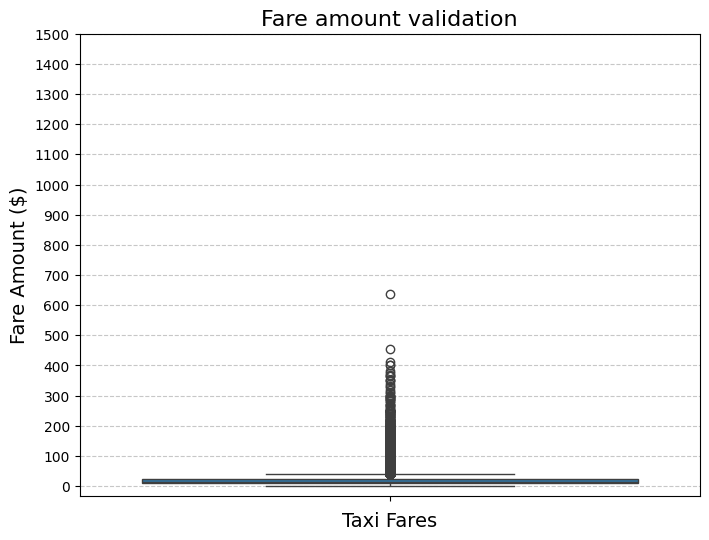

In [141]:
# Continue with outlier handling
# lets check the  fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_3['fare_amount'])
plt.title('Fare amount validation',fontsize=16)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.xlabel('Taxi Fares', fontsize=14)
plt.yticks(range(0, 1600, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [152]:
# most of the fares are below 300  (it is not clear as it is too much skewed )
#lets check how many rows have fare amount more than 50 100 , 200  and 300
print('no of rows with fare_amount 0 : '+str(df_3[df_3['fare_amount']==0].shape[0]))
for fare in (0,50,100,200,300,500,600,700,800,900,1000):
    print('no of rows with fare_amount >'+str(fare)+' : '+str(df_3[df_3['fare_amount']>fare].shape[0]))


no of rows with fare_amount 0 : 84
no of rows with fare_amount >0 : 270143
no of rows with fare_amount >50 : 20687
no of rows with fare_amount >100 : 876
no of rows with fare_amount >200 : 84
no of rows with fare_amount >300 : 19
no of rows with fare_amount >500 : 1
no of rows with fare_amount >600 : 1
no of rows with fare_amount >700 : 0
no of rows with fare_amount >800 : 0
no of rows with fare_amount >900 : 0
no of rows with fare_amount >1000 : 0


In [153]:
#lets find out  max and min values for trip_distance
print('maximum distance taxi travelled in data :'+str(df_3['trip_distance'].max()))
print('minimum distance taxi travelled in data :'+str(df_3['trip_distance'].min()))

maximum distance taxi travelled in data :9674.01
minimum distance taxi travelled in data :0.0


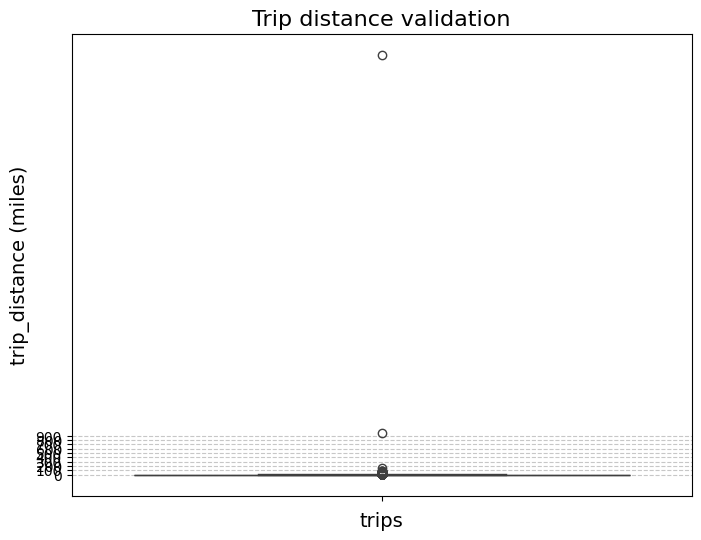

In [175]:
# seems interesting about the fareamount grater than 300  are those real values 
# lets check the distance travelled as well 
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_3['trip_distance'])
plt.title('Trip distance validation',fontsize=16)
plt.ylabel('trip_distance (miles)', fontsize=14)
plt.xlabel('trips', fontsize=14)
plt.yticks(range(0, 1000, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# as we have seen above box plot and values displayed , lets consider our base fare amount as 300$ and lets trim the data above 300$ fare amount 
#let df4 be that dataframe
df4=df_3[df_3['fare_amount']<=300]

In [22]:
df4.reset_index(drop=True,inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270208 entries, 0 to 270207
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               270208 non-null  int64         
 1   tpep_pickup_datetime   270208 non-null  datetime64[us]
 2   tpep_dropoff_datetime  270208 non-null  datetime64[us]
 3   passenger_count        270208 non-null  float64       
 4   trip_distance          270208 non-null  float64       
 5   RatecodeID             270208 non-null  int32         
 6   store_and_fwd_flag     270208 non-null  object        
 7   PULocationID           270208 non-null  int64         
 8   DOLocationID           270208 non-null  int64         
 9   payment_type           270208 non-null  int64         
 10  fare_amount            270208 non-null  float64       
 11  mta_tax                270208 non-null  float64       
 12  tip_amount             270208 non-null  floa

In [159]:
# checking my data set is having duplicate rows 
duplicates = df4.duplicated()
print(df4[duplicates])

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport__Fee]
Index: []


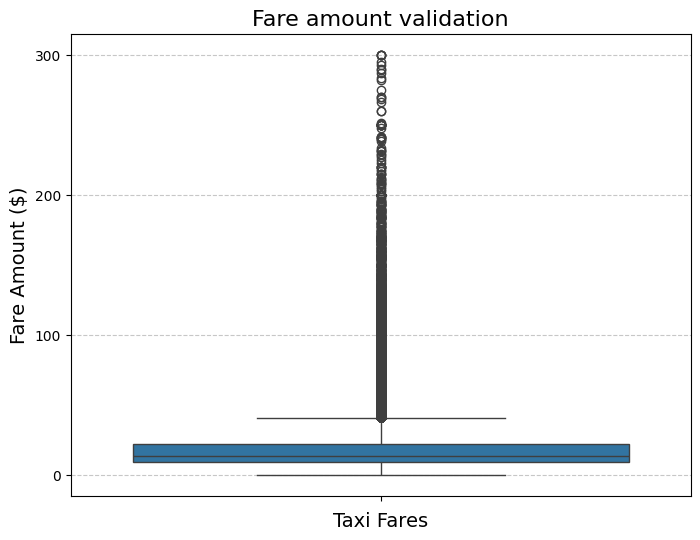

In [10]:
# Continue with outlier handling
# lets check the  fare_amount
plt.figure(figsize=(8, 6))
sns.boxplot(y=df4['fare_amount'])
plt.title('Fare amount validation',fontsize=16)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.xlabel('Taxi Fares', fontsize=14)
plt.yticks(range(0, 400, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [167]:
print('maximum distance taxi travelled in data :'+str(df4['trip_distance'].max()))
print('minimum distance taxi travelled in data :'+str(df4['trip_distance'].min()))
print('minimum distance taxi travelled in data :'+str(df4['trip_distance'].mean()))

maximum distance taxi travelled in data :9674.01
minimum distance taxi travelled in data :0.0
minimum distance taxi travelled in data :3.5038521435338708


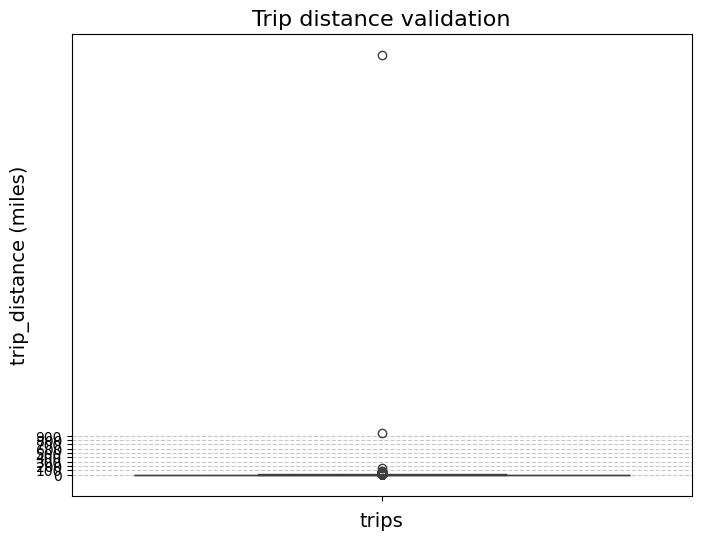

In [11]:
# lets check the distance travelled as well 
plt.figure(figsize=(8, 6))
sns.boxplot(y=df4['trip_distance'])
plt.title('Trip distance validation',fontsize=16)
plt.ylabel('trip_distance (miles)', fontsize=14)
plt.xlabel('trips', fontsize=14)
plt.yticks(range(0, 1000, 100))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [170]:
#as seen above  some large values are there and some distance values are 0 we need to remove this as well from the data set 
#first find out columns trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime for trip_distance is 0 
print(df4[df4['trip_distance'] == 0][['trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']])

        trip_distance tpep_pickup_datetime tpep_dropoff_datetime
106               0.0  2023-01-01 02:21:25   2023-01-01 02:21:27
121               0.0  2023-01-01 02:35:44   2023-01-01 02:35:54
150               0.0  2023-01-01 04:22:34   2023-01-01 04:23:20
223               0.0  2023-01-01 09:41:34   2023-01-01 09:41:40
287               0.0  2023-01-01 11:14:27   2023-01-01 11:14:44
...               ...                  ...                   ...
269937            0.0  2023-09-29 17:06:03   2023-09-29 17:06:11
269969            0.0  2023-09-29 18:51:48   2023-09-29 18:51:51
270061            0.0  2023-09-29 19:44:26   2023-09-29 19:44:41
270151            0.0  2023-09-29 22:26:09   2023-09-29 22:26:12
270189            0.0  2023-09-29 23:13:18   2023-09-29 23:25:32

[3338 rows x 3 columns]


In [23]:
# from above there are 3338 rows with trip distance 0.0 lets remove those 
df4=df4[~(df4['trip_distance']==0)]
print('maximum distance taxi travelled in data :'+str(df4['trip_distance'].max()))
print('minimum distance taxi travelled in data :'+str(df4['trip_distance'].min()))
print('minimum distance taxi travelled in data :'+str(df4['trip_distance'].mean()))

maximum distance taxi travelled in data :9674.01
minimum distance taxi travelled in data :0.01
minimum distance taxi travelled in data :3.547678195376026


In [24]:
# now sort the column trip distance and find the 3rd largest value as 1st and 2nd highest value seems to be outlier
sorted_value=df4['trip_distance'].sort_values(ascending=False)
print("Highest:" + str(sorted_value.iloc[0]))
print("Second Highest:" + str(sorted_value.iloc[1]))
print("Third Highest:"+str(sorted_value.iloc[2]))

Highest:9674.01
Second Highest:969.1
Third Highest:159.85


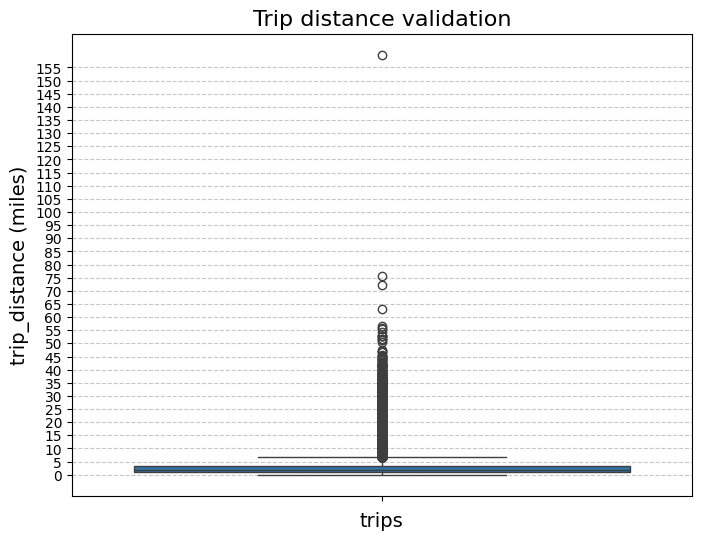

In [25]:
# lets remove trip distance more than 160 miles 
df4=df4[~(df4['trip_distance']>160)]
# lets check the distance travelled as well 
plt.figure(figsize=(8, 6))
sns.boxplot(y=df4['trip_distance'])
plt.title('Trip distance validation',fontsize=16)
plt.ylabel('trip_distance (miles)', fontsize=14)
plt.xlabel('trips', fontsize=14)
plt.yticks(range(0, 160, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

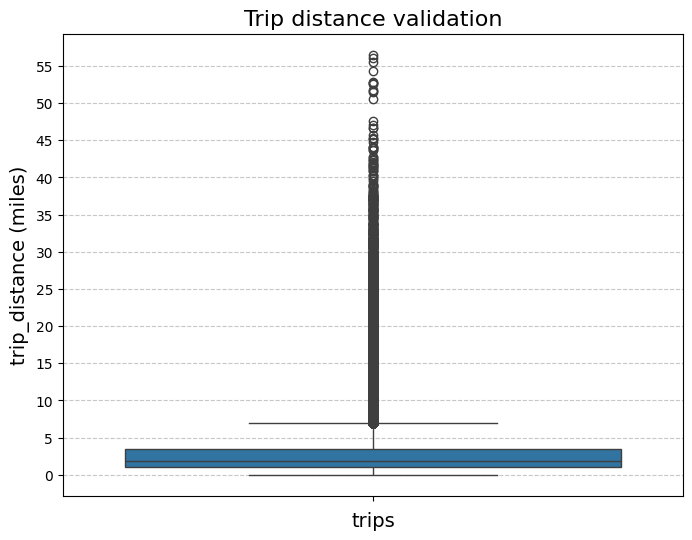

In [30]:
# again if you notice only few trips above 60 we can remove that as well proper analysis 
df4=df4[~(df4['trip_distance']>60)]
# lets check the distance travelled as well 
plt.figure(figsize=(8, 6))
sns.boxplot(y=df4['trip_distance'])
plt.title('Trip distance validation',fontsize=16)
plt.ylabel('trip_distance (miles)', fontsize=14)
plt.xlabel('trips', fontsize=14)
plt.yticks(range(0, 60, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
# Do any columns need standardising?
df4.reset_index(drop=True,inplace=True)
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266864 entries, 0 to 266863
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               266864 non-null  int64         
 1   tpep_pickup_datetime   266864 non-null  datetime64[us]
 2   tpep_dropoff_datetime  266864 non-null  datetime64[us]
 3   passenger_count        266864 non-null  float64       
 4   trip_distance          266864 non-null  float64       
 5   RatecodeID             266864 non-null  int32         
 6   store_and_fwd_flag     266864 non-null  object        
 7   PULocationID           266864 non-null  int64         
 8   DOLocationID           266864 non-null  int64         
 9   payment_type           266864 non-null  int64         
 10  fare_amount            266864 non-null  float64       
 11  mta_tax                266864 non-null  float64       
 12  tip_amount             266864 non-null  floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport__Fee
0,2,2023-01-01 00:05:24,2023-01-01 00:33:50,1.0,14.44,1,N,162,3,1,56.2,0.5,0.10,0.0,1.0,61.30,2.5,2023-01-01,0,0.0
1,2,2023-01-01 00:56:31,2023-01-01 01:07:51,2.0,1.73,1,N,144,113,1,12.1,0.5,2.05,0.0,1.0,19.15,2.5,2023-01-01,0,0.0
2,1,2023-01-01 00:23:32,2023-01-01 01:19:37,2.0,4.60,1,N,142,137,1,46.4,0.5,4.00,0.0,1.0,55.40,2.5,2023-01-01,0,0.0
3,1,2023-01-01 00:38:19,2023-01-01 00:42:28,1.0,0.60,1,N,263,236,1,5.1,0.5,1.51,0.0,1.0,11.61,2.5,2023-01-01,0,0.0
4,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1,N,79,256,1,19.1,0.5,6.02,0.0,1.0,30.12,2.5,2023-01-01,0,0.0


In [36]:
# just for curiosity lets find out how many columns have fare_amount =0 and total amount=0
print('now of rows with fare_amount=0'+str(df4[df4['fare_amount']<=0].shape[0]))
print('now of rows with total_amount=0'+str(df4[df4['total_amount']<=0].shape[0]))

now of rows with fare_amount=043
now of rows with total_amount=012


In [38]:
# let us remove columns with fare_amount 0 
df4=df4[~(df4['fare_amount']<=0)]
print('now of rows with total_amount=0'+str(df4[df4['total_amount']<=0].shape[0]))

now of rows with total_amount=00


In [39]:
df4.reset_index(drop=True,inplace=True)
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266821 entries, 0 to 266820
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               266821 non-null  int64         
 1   tpep_pickup_datetime   266821 non-null  datetime64[us]
 2   tpep_dropoff_datetime  266821 non-null  datetime64[us]
 3   passenger_count        266821 non-null  float64       
 4   trip_distance          266821 non-null  float64       
 5   RatecodeID             266821 non-null  int32         
 6   store_and_fwd_flag     266821 non-null  object        
 7   PULocationID           266821 non-null  int64         
 8   DOLocationID           266821 non-null  int64         
 9   payment_type           266821 non-null  int64         
 10  fare_amount            266821 non-null  float64       
 11  mta_tax                266821 non-null  float64       
 12  tip_amount             266821 non-null  floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport__Fee
0,2,2023-01-01 00:05:24,2023-01-01 00:33:50,1.0,14.44,1,N,162,3,1,56.2,0.5,0.10,0.0,1.0,61.30,2.5,2023-01-01,0,0.0
1,2,2023-01-01 00:56:31,2023-01-01 01:07:51,2.0,1.73,1,N,144,113,1,12.1,0.5,2.05,0.0,1.0,19.15,2.5,2023-01-01,0,0.0
2,1,2023-01-01 00:23:32,2023-01-01 01:19:37,2.0,4.60,1,N,142,137,1,46.4,0.5,4.00,0.0,1.0,55.40,2.5,2023-01-01,0,0.0
3,1,2023-01-01 00:38:19,2023-01-01 00:42:28,1.0,0.60,1,N,263,236,1,5.1,0.5,1.51,0.0,1.0,11.61,2.5,2023-01-01,0,0.0
4,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1,N,79,256,1,19.1,0.5,6.02,0.0,1.0,30.12,2.5,2023-01-01,0,0.0


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [40]:
df4.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport__Fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

From first list Numerical variables are 
* pickup_hour  -- (in my data set it is just hour)* 
trip_duratio
* trip_distance
* passenger_count

Remaining are Categorical variable

* VendorID:* 
tpep_pickup_datetime
* 
tpep_dropoff_datetim
* RatecodeID:
* 
PULocationID
* 
DOLocationI
* payment_typeD:e:n

In the second list all are Numerical variable

fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [42]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df4.groupby('hour').size().reset_index(name='pickup_count')
print(hourly_pickups)

    hour  pickup_count
0      0          7478
1      1          5005
2      2          3278
3      3          2139
4      4          1364
5      5          1427
6      6          3559
7      7          7135
8      8          9913
9      9         11357
10    10         12451
11    11         13496
12    12         14668
13    13         15101
14    14         16194
15    15         16612
16    16         16608
17    17         18001
18    18         18899
19    19         16949
20    20         15145
21    21         15097
22    22         13966
23    23         10979


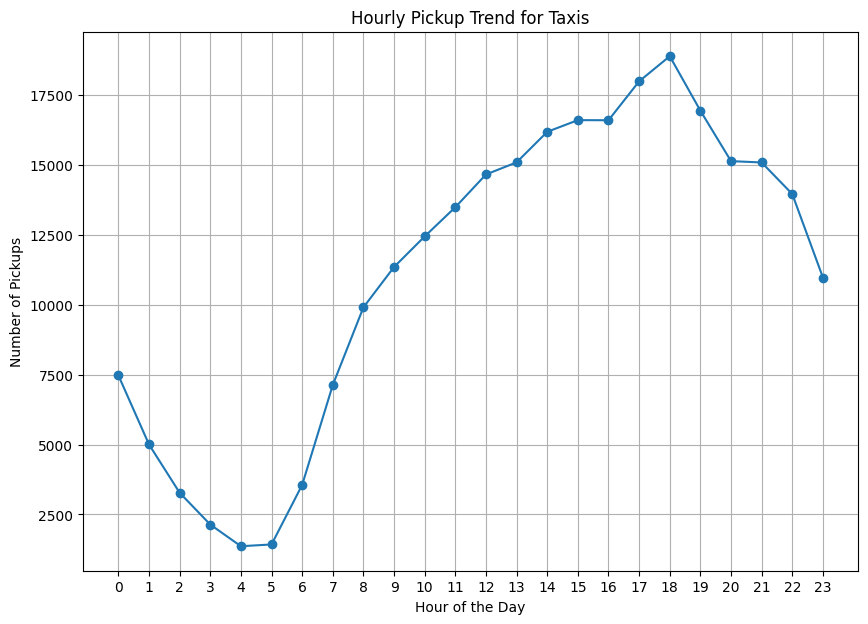

In [43]:
plt.figure(figsize=(10, 7))
plt.plot(hourly_pickups['hour'], hourly_pickups['pickup_count'], marker='o', linestyle='-')
plt.title('Hourly Pickup Trend for Taxis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()

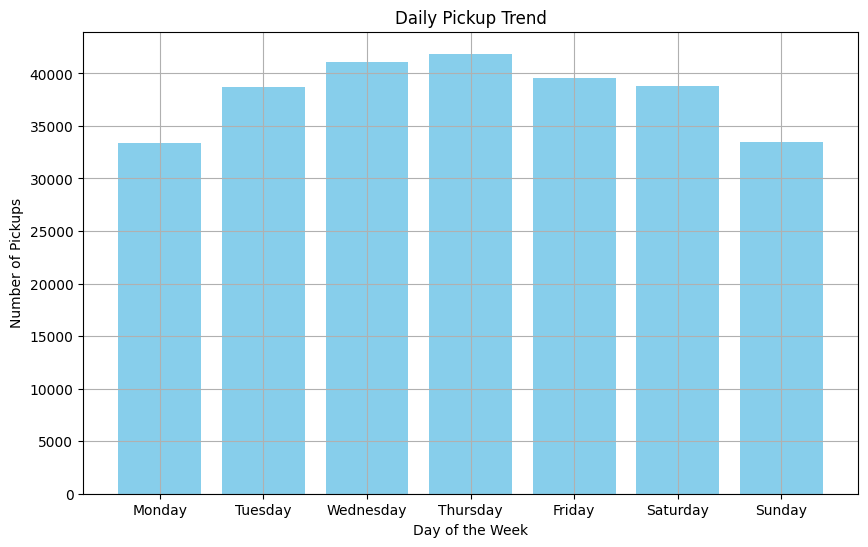

In [45]:
# Find and show the daily trends in taxi pickups (days of the week)
# lets add one column for week_Day
df4['week_Day']=df4['tpep_pickup_datetime'].dt.dayofweek
#lets consider as a set
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df4['day_name'] = df4['week_Day'].map(day_names)
daily_pickups = df4.groupby('day_name').size().reindex(day_names.values()).reset_index(name='pickup_count')
plt.figure(figsize=(10, 6))
plt.bar(daily_pickups['day_name'], daily_pickups['pickup_count'], color='skyblue')
plt.title('Daily Pickup Trend')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

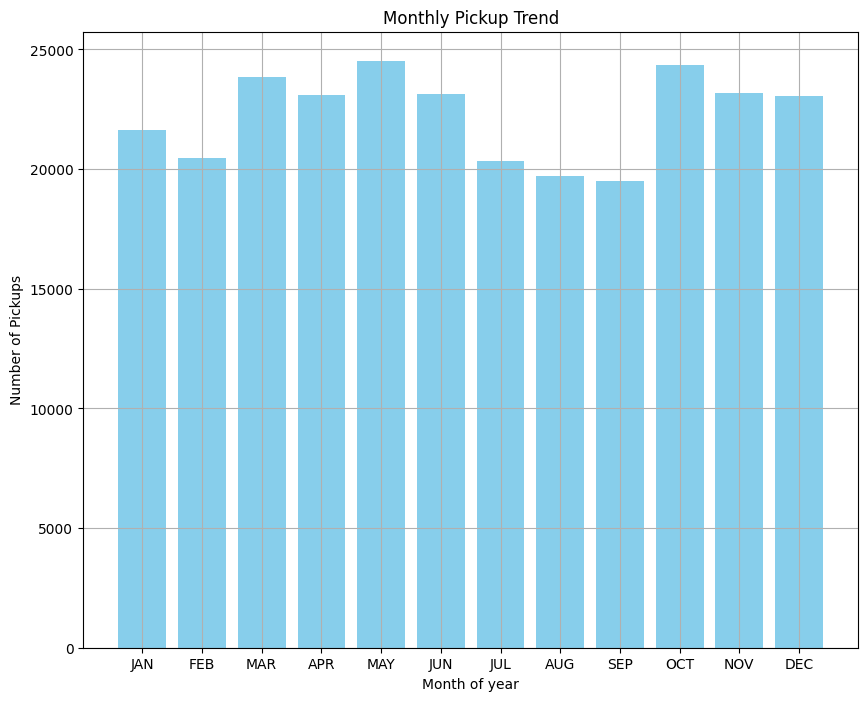

In [48]:
# Show the monthly trends in pickups
df4['Month']=df4['tpep_pickup_datetime'].dt.month
months_ = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC' }
df4['Month_name']=df4['Month'].map(months_)
monthly_trend=df4.groupby('Month_name').size().reindex(months_.values()).reset_index(name='pickup_count')
plt.figure(figsize=(10, 8))
plt.bar(monthly_trend['Month_name'], monthly_trend['pickup_count'], color='skyblue')
plt.title('Monthly Pickup Trend')
plt.xlabel('Month of year')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [49]:
# Analyse the above parameters
print('now of rows with fare_amount=0'+str(df4[df4['fare_amount']<=0].shape[0]))
print('now of rows with total_amount=0'+str(df4[df4['total_amount']<=0].shape[0]))
print('now of rows with tip_amount=0'+str(df4[df4['tip_amount']<=0].shape[0]))
print('now of rows with trip_distance=0'+str(df4[df4['trip_distance']<=0].shape[0]))


now of rows with fare_amount=00
now of rows with total_amount=00
now of rows with tip_amount=058304
now of rows with trip_distance=00


As I have cleaned up the 0 values for trip_distance , total_amount , total_amount 
also tip_amount 0 doesnt impact our analysis

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

I have already performed the cleanup , my resulting data set is having 266820 rows

In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266821 entries, 0 to 266820
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               266821 non-null  int64         
 1   tpep_pickup_datetime   266821 non-null  datetime64[us]
 2   tpep_dropoff_datetime  266821 non-null  datetime64[us]
 3   passenger_count        266821 non-null  float64       
 4   trip_distance          266821 non-null  float64       
 5   RatecodeID             266821 non-null  int32         
 6   store_and_fwd_flag     266821 non-null  object        
 7   PULocationID           266821 non-null  int64         
 8   DOLocationID           266821 non-null  int64         
 9   payment_type           266821 non-null  int64         
 10  fare_amount            266821 non-null  float64       
 11  mta_tax                266821 non-null  float64       
 12  tip_amount             266821 non-null  floa

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [51]:
# Create a df with non zero entries for the selected parameters.
print('now of rows with fare_amount=0'+str(df4[df4['fare_amount']<=0].shape[0]))
print('now of rows with total_amount=0'+str(df4[df4['total_amount']<=0].shape[0]))
print('now of rows with tip_amount=0'+str(df4[df4['tip_amount']<=0].shape[0]))
print('now of rows with trip_distance=0'+str(df4[df4['trip_distance']<=0].shape[0]))


now of rows with fare_amount=00
now of rows with total_amount=00
now of rows with tip_amount=058304
now of rows with trip_distance=00


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

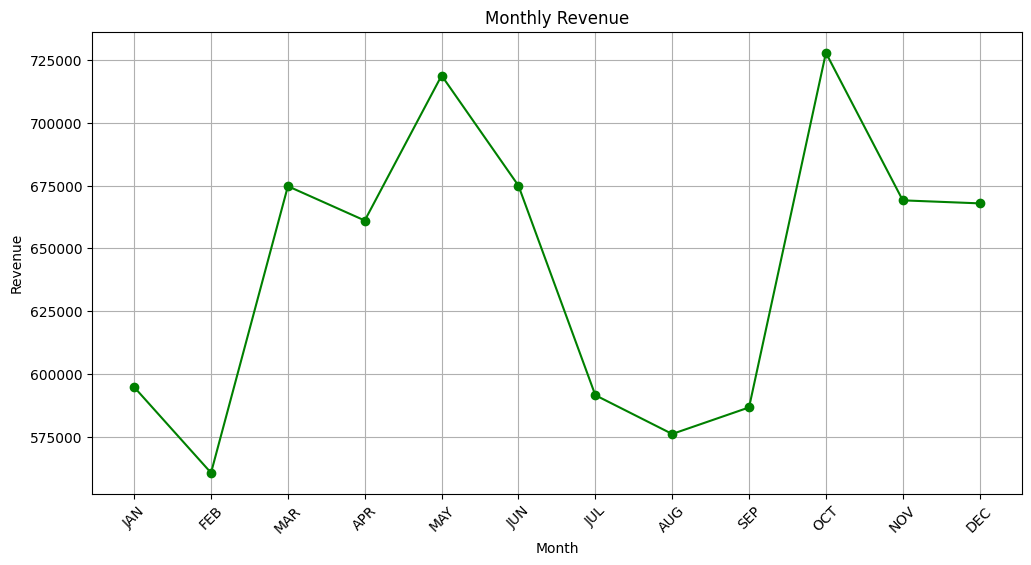

In [54]:
# Group data by month and analyse monthly revenue
monthly_revenue = df4.groupby('Month_name')['total_amount'].sum().reindex(months_.values()).reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month_name'], monthly_revenue['total_amount'], marker='o', linestyle='-', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

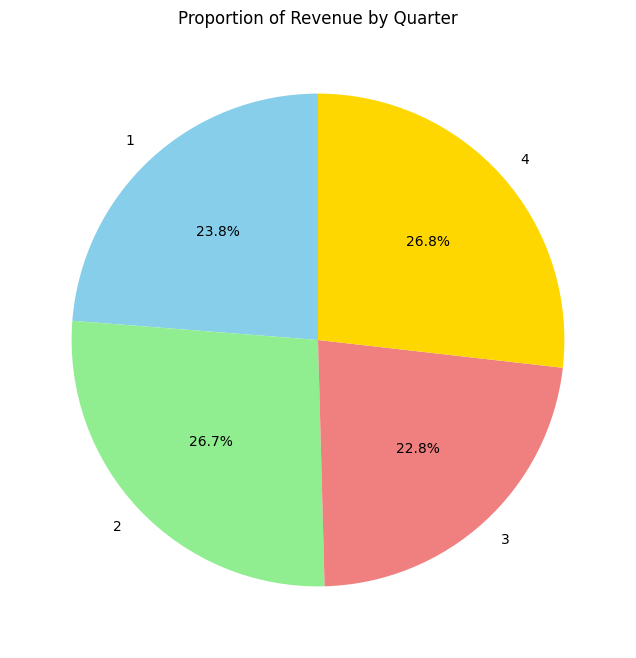

In [60]:
# Calculate proportion of each quarter
# lets use a pie chart for displaying quarter wise revenue
df4['quarter_']=df4['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df4.groupby('quarter_')['total_amount'].sum().reset_index()
total_revenue = quarter_revenue['total_amount'].sum()
quarter_revenue['proportion'] = (quarter_revenue['total_amount'] / total_revenue) * 100
#print(quarter_revenue)
plt.figure(figsize=(8, 8))
plt.pie(quarter_revenue['proportion'], labels=quarter_revenue['quarter_'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Proportion of Revenue by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

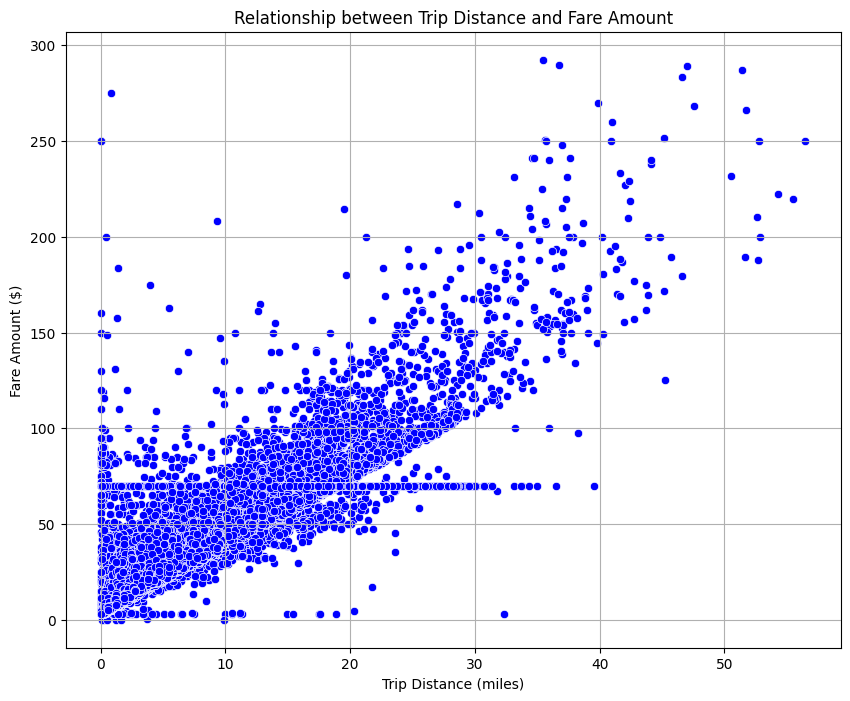

Correlation between Trip Distance and Fare Amount: 0.95


In [63]:
# Show how trip fare is affected by distance
# I have already cleaned up the data with trip_distance having 0

# we can use a scatterplot for the same 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df4, color='blue')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df4['trip_distance'].corr(df4['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

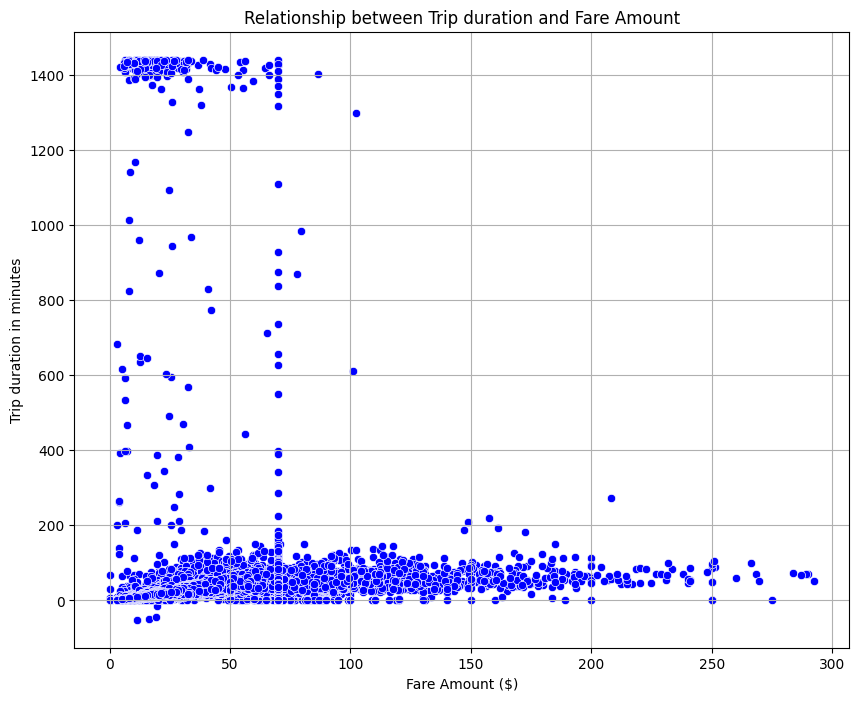

Correlation between fare Amount and trip_duration: 0.28


In [66]:
# Show relationship between fare and trip duration
df4['trip_duration'] = (df4['tpep_dropoff_datetime'] - df4['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 8))
sns.scatterplot(x='fare_amount', y='trip_duration', data=df4, color='blue')
plt.title('Relationship between Trip duration and Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip duration in minutes')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df4['fare_amount'].corr(df4['trip_duration'])
print(f"Correlation between fare Amount and trip_duration: {correlation:.2f}")


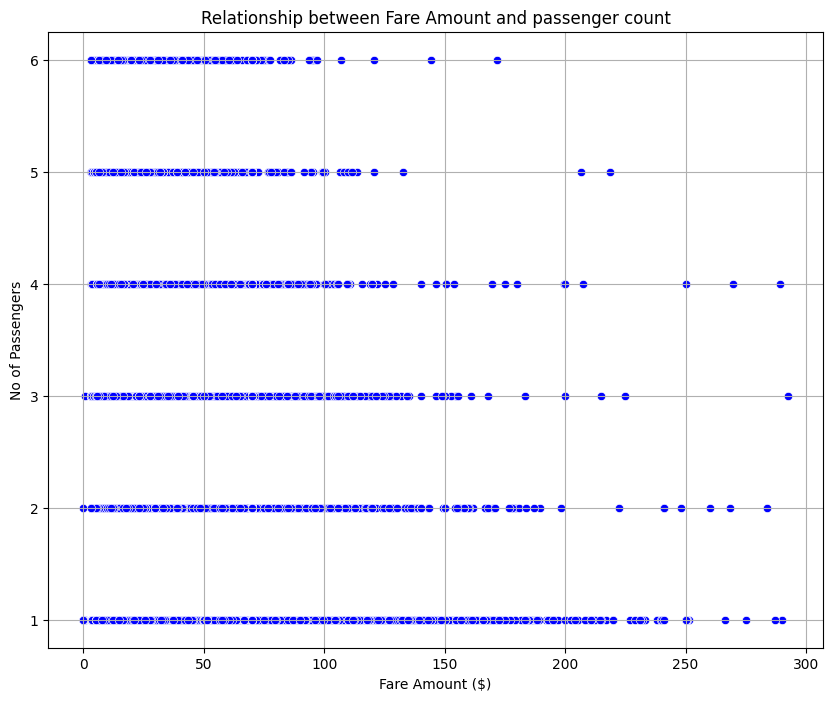

Correlation between fare Amount and No of passengers : 0.04


In [67]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 8))
sns.scatterplot(x='fare_amount', y='passenger_count', data=df4, color='blue')
plt.title('Relationship between Fare Amount and passenger count')
plt.xlabel('Fare Amount ($)')
plt.ylabel('No of Passengers')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df4['fare_amount'].corr(df4['passenger_count'])
print(f"Correlation between fare Amount and No of passengers : {correlation:.2f}")


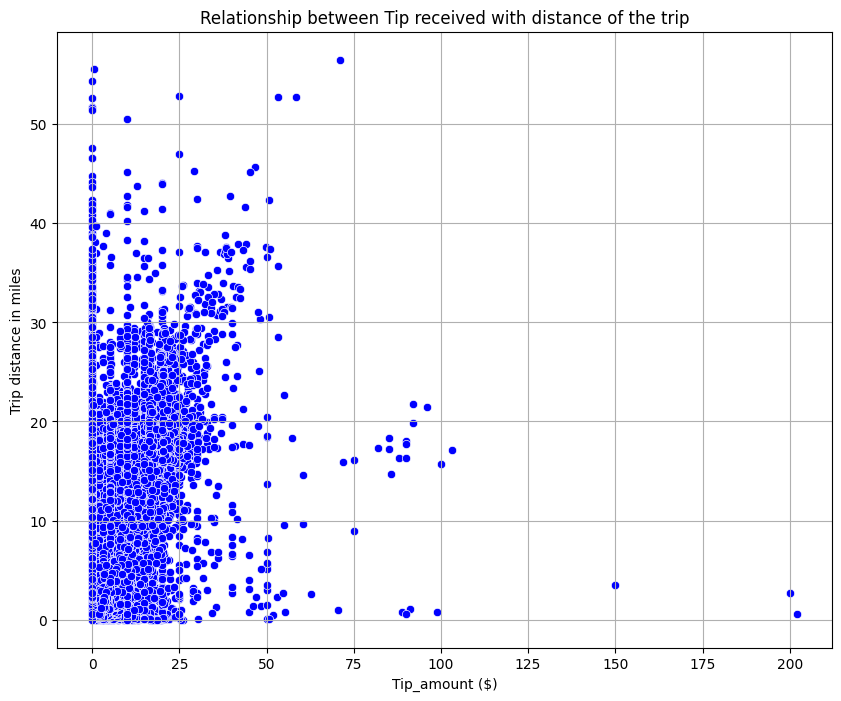

Correlation between Tip Amount and trip_distance : 0.58


In [69]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tip_amount', y='trip_distance', data=df4, color='blue')
plt.title('Relationship between Tip received with distance of the trip')
plt.xlabel('Tip_amount ($)')
plt.ylabel('Trip distance in miles')
plt.grid(True)
plt.show()
#Calculate the correlation value
correlation = df4['tip amount'].corr(df4['trip_distance'])
print(f"Correlation between Tip Amount and trip_distance : {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

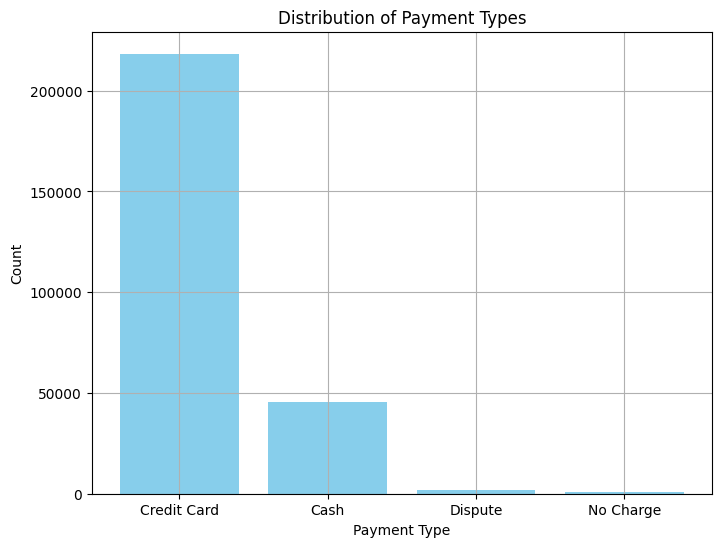

In [73]:
# Analyse the distribution of different payment types (payment_type).
# Payment_type_name can be new column

Payment_name = {1: 'Credit Card',2: 'Cash',3: 'No Charge',4: 'Dispute'}
df4['Payment_type_name'] = df4['payment_type'].map(Payment_name)
payment_distribution = df4['Payment_type_name'].value_counts().reset_index()
payment_distribution.columns = ['Payment Type', 'Count']
plt.figure(figsize=(8, 6))
plt.bar(payment_distribution['Payment Type'], payment_distribution['Count'], color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [96]:
df4.to_parquet('df4.parquet',index=False)

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [74]:
 !pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------------------------- -------- 256.0/323.6 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.7/16.2 MB 22.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.6/16.2 MB 20.7 MB/s eta 0:00:01
   ------ --------------------------------- 2.5/16.2 MB 19.6 MB/s eta 0:00:01
   -------- ------------------------------- 3.3/16.2 MB 20.9 MB/s eta 0:00:01
   -------- ------------------------------- 3.4/16.2 MB 16.9 MB/s eta 0:00:01
   --------- ------------------------------ 3.8/16.2 MB 16.2 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 15.7 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 15.7 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 15.7 MB/s eta 0:00:

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [106]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

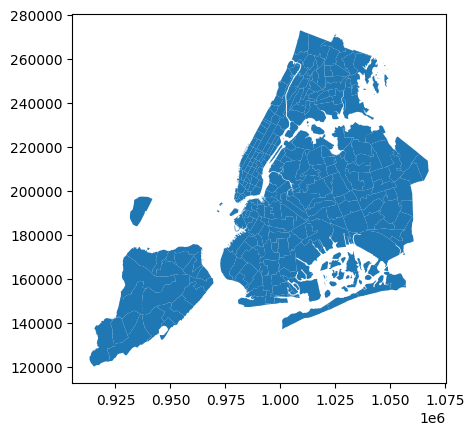

In [107]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [99]:
# Merge zones and trip records using locationID and PULocationID
df4_zones = pd.merge(
    zones,
    df4,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

df4_zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 264436 entries, 0 to 264435
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OBJECTID               264436 non-null  int32         
 1   Shape_Leng             264436 non-null  float64       
 2   Shape_Area             264436 non-null  float64       
 3   zone                   264436 non-null  object        
 4   LocationID             264436 non-null  int32         
 5   borough                264436 non-null  object        
 6   geometry               264436 non-null  geometry      
 7   VendorID               264408 non-null  float64       
 8   tpep_pickup_datetime   264408 non-null  datetime64[us]
 9   tpep_dropoff_datetime  264408 non-null  datetime64[us]
 10  passenger_count        264408 non-null  float64       
 11  trip_distance          264408 non-null  float64       
 12  RatecodeID             264408 non-nu

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [112]:
# atry 
df4_zones.describe()

,OBJECTID,Shape_Leng,Shape_Area,LocationID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,Airport__Fee,week_Day,Month,quarter_,trip_duration
count,264436.000000,264436.000000,264436.000000,264436.000000,264408.000000,264408,264408,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.00000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000,264408.000000
mean,164.600296,0.057149,0.000224,164.600213,1.748483,2023-07-02 06:36:57.885740,2023-07-02 06:54:28.317520,1.391970,3.500711,1.585190,164.603794,163.568825,1.198315,19.677859,0.496994,3.589535,0.598052,0.999658,28.849868,2.32475,14.310917,0.144739,2.995927,6.522129,2.506967,17.507196
min,1.000000,0.014306,0.000006,1.000000,1.000000,2023-01-01 00:04:55,2023-01-01 00:10:20,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1.010000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,-51.350000
25%,132.000000,0.035804,0.000066,132.000000,1.000000,2023-04-02 01:52:03.500000,2023-04-02 02:08:37,1.000000,1.090000,1.000000,132.000000,113.000000,1.000000,9.300000,0.500000,1.000000,0.000000,1.000000,15.960000,2.50000,11.000000,0.000000,1.000000,4.000000,2.000000,7.733333
50%,161.000000,0.042213,0.000094,161.000000,2.000000,2023-06-26 18:46:14.500000,2023-06-26 18:59:22,1.000000,1.800000,1.000000,161.000000,162.000000,1.000000,13.500000,0.500000,2.880000,0.000000,1.000000,21.000000,2.50000,15.000000,0.000000,3.000000,6.000000,2.000000,12.666667
75%,233.000000,0.052793,0.000129,233.000000,2.000000,2023-10-06 11:34:25.250000,2023-10-06 11:53:38,1.000000,3.420000,1.000000,233.000000,234.000000,1.000000,21.900000,0.500000,4.480000,0.000000,1.000000,30.720000,2.50000,19.000000,0.000000,5.000000,10.000000,4.000000,20.600000
max,263.000000,0.433470,0.004866,263.000000,2.000000,2023-12-31 23:51:50,2024-01-01 20:14:57,6.000000,56.500000,99.000000,263.000000,265.000000,4.000000,292.500000,0.800000,200.000000,87.500000,1.000000,355.670000,2.50000,23.000000,1.750000,6.000000,12.000000,4.000000,1439.666667
std,63.183814,0.048968,0.000448,63.183947,0.433886,NaN,NaN,0.882334,4.514637,7.147806,63.182275,69.498325,0.454677,17.608261,0.038708,4.018171,2.167580,0.015585,22.325789,0.63829,5.780117,0.467557,1.927901,3.465047,1.128620,40.521236


In [120]:
pickup_trip_counts = df4_zones.groupby('PULocationID').size().reset_index(name='pickup_trip_count')
#location_gdf=gpd.GeoDataFrame(pickup_trip_counts, geometry='geometry')
pickup_trip_counts.info()
pickup_trip_counts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PULocationID       234 non-null    float64
 1   pickup_trip_count  234 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.8 KB


,PULocationID,pickup_trip_count
0,1.0,8
1,3.0,6
2,4.0,248
3,5.0,2
4,6.0,1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

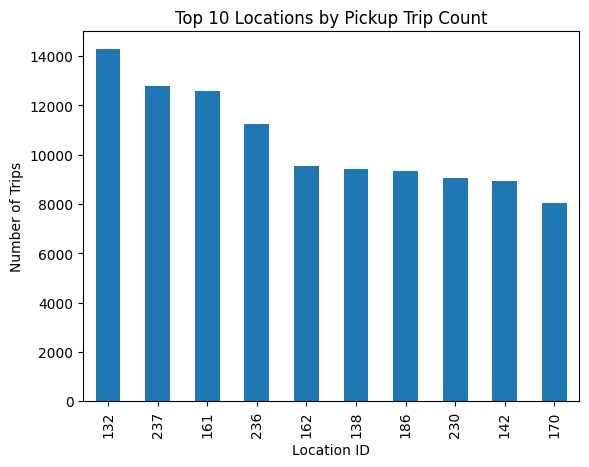

In [124]:
# Merge trip counts back to the zones GeoDataFrame
zones_merge=zones.merge(pickup_trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones_merge['pickup_trip_count'] = zones_merge['pickup_trip_count'].fillna(0)
zones_merge = zones_merge.sort_values('pickup_trip_count', ascending=False)
zones_merge.head(10).plot(kind='bar', x='LocationID', y='pickup_trip_count', legend=False)
plt.title('Top 10 Locations by Pickup Trip Count')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [128]:
!pip install mapclassify

   ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
   ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
   ------------- -------------------------- 20.5/59.1 kB 165.2 kB/s eta 0:00:01
   --------------------------- ------------ 41.0/59.1 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 59.1/59.1 kB 390.8 kB/s eta 0:00:00


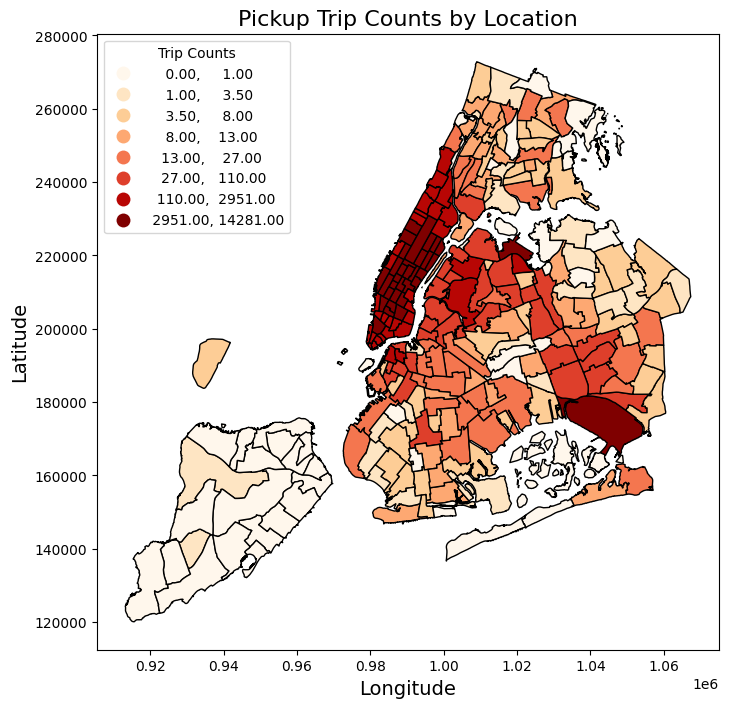

In [164]:
# Define figure and axis
zones_merge=gpd.GeoDataFrame(zones_merge, geometry='geometry')
zones_merge['pickup_trip_count']=zones_merge['pickup_trip_count'].astype(int)
zones_merge.plot(
    column='pickup_trip_count',  
    legend=True,
    #legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
    legend_kwds = {'title': "Trip Counts", 'loc': "upper left" },
    classification_kwds={'k': 8},
    #legend_kwds={'title': 'Trip Counts', 'loc': 'upper right', 'k': 5},
    figsize=(12, 8),            
    cmap='OrRd',                
    #scheme='equal_interval', 
    scheme='quantiles',
    edgecolor='black',          
    linewidth=1               
)
# Plot the map and display it
plt.title('Pickup Trip Counts by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.show()


In [163]:
# can you try displaying the zones DF sorted by the number of trips?
zones_merge.head(20)['pickup_trip_count']
# I have already sorted zones_merge

131    14281
236    12801
160    12587
235    11261
161     9544
137     9404
185     9334
229     9036
141     8910
169     8049
162     7883
238     7255
233     7150
47      7066
67      6964
140     6370
163     6328
78      6188
248     5906
106     5614
Name: pickup_trip_count, dtype: int32

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [325]:
# Find routes which have the slowest speeds at different times of the day
#check if tripduration is in data
#df4_zones.info()
slow_routes_per_hour=df4_zones.groupby(['hour','PULocationID','DOLocationID'])['trip_duration'].mean().reset_index()
slow_routes_per_hour=slow_routes_per_hour.sort_values(by=['hour','trip_duration'],ascending=[True,False])
slowest_by_hour=slow_routes_per_hour.groupby('hour').head(1)
slowest_by_hour
#zones_merge.info()


,hour,PULocationID,DOLocationID,trip_duration
2597,0.0,263.0,68.0,1434.666667
3104,1.0,100.0,145.0,1409.033333
5423,2.0,144.0,100.0,1416.833333
6288,3.0,45.0,249.0,1432.083333
8290,4.0,237.0,238.0,1420.550000
8840,5.0,142.0,142.0,1413.550000
10165,6.0,163.0,140.0,472.411111
12638,7.0,246.0,41.0,1437.383333
13028,8.0,50.0,43.0,1431.333333
17733,9.0,261.0,1.0,869.483333


How does identifying high-traffic, high-demand routes help us?

High traffic areas have high tripduration and by identifying them (per hour per day ) we can choose a less traffic route to the destination.
By finding out high-demand pickup locations per hour per day , we can alot more number of cabs to these locations.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18.0 with 18725.0 trips


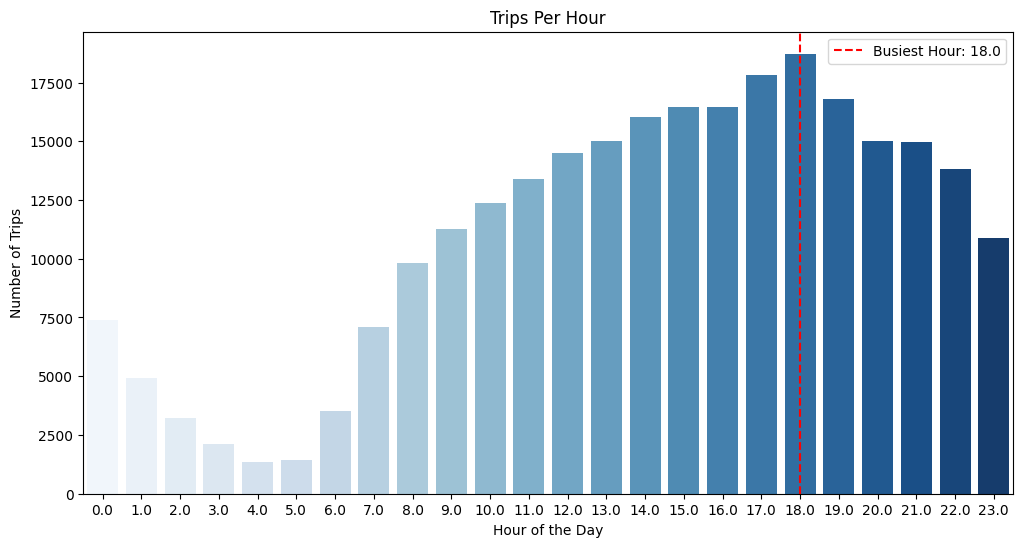

In [184]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df4_zones.groupby('hour').size().reset_index(name='trip_count')
busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['hour']} with {busiest_hour['trip_count']} trips")
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='hour', y='trip_count', palette="Blues")

# Highlight busiest hour
plt.axvline(busiest_hour['hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour['hour']}")

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips Per Hour')
plt.legend()
plt.xticks(range(24))  # Ensure all hours are visible

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Busiest hour: 18.0 with 124833.33333333334 trips


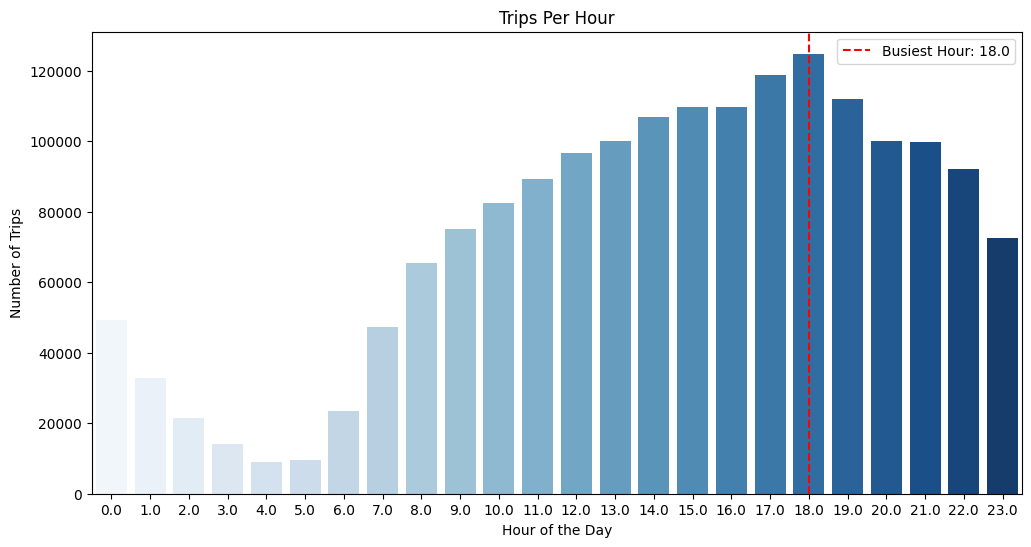

In [186]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
#line 135 i have sampled the data again as I was getting memory error (line numbers are jumbled)
sample_fraction =.15
scaling_facter =1/sample_fraction
trips_per_hour = df4_zones.groupby('hour').size().reset_index(name='trip_count')
trips_per_hour['actual_trip_count'] = trips_per_hour['trip_count'] * scaling_facter
busiest_hour = trips_per_hour.loc[trips_per_hour['actual_trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['hour']} with {busiest_hour['actual_trip_count']} trips")
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='hour', y='actual_trip_count', palette="Blues")

plt.axvline(busiest_hour['hour'], color='red', linestyle='--', label=f"Busiest Hour: {busiest_hour['hour']}")

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips Per Hour')
plt.legend()
plt.xticks(range(24))

plt.show()


Insights from the data
* The peak hour ( here 3pm to  7pm above 1 lakh requests ) indicates high demand for rides.
* Off-peak hours (here midnight- 01 Am- 6AM nearly 20k trips only) have fewer trips.
* as I mentioned above this helps in taxi allocation and pricing strategies

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

Busiest Weekday Hour: 18.0 with approx. 95086 trips
Busiest Weekend Hour: 17.0 with approx. 29820 trips


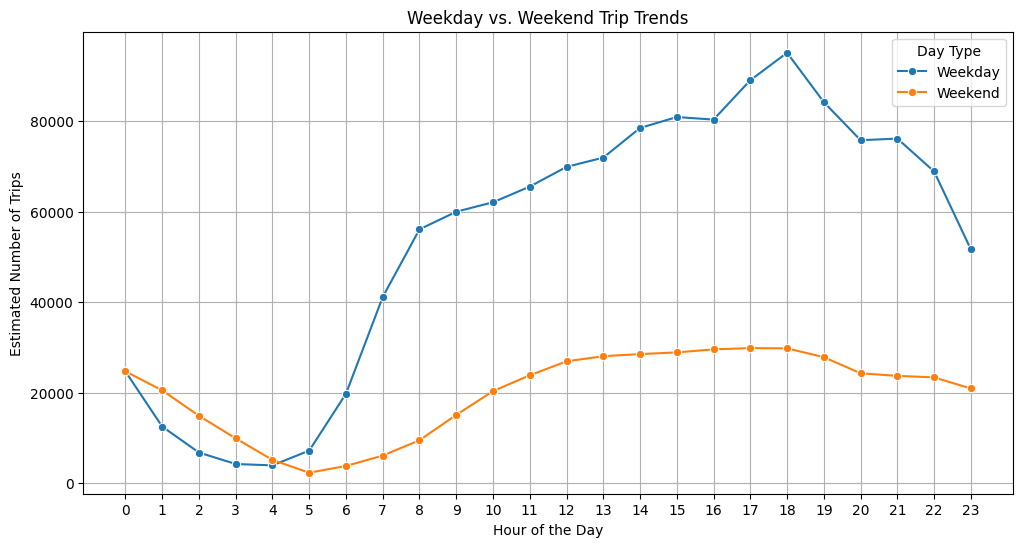

In [190]:
# Compare traffic trends for the week days and weekends
sample_fraction =.15
scaling_facter =1/sample_fraction
df4_zones['day_type']=df4_zones['tpep_pickup_datetime'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
trips_per_hour = df4_zones.groupby(['day_type','hour']).size().reset_index(name='trip_count')
trips_per_hour['actual_trip_count'] = trips_per_hour['trip_count'] * scaling_facter

busiest_weekday = trips_per_hour[trips_per_hour['day_type'] == 'Weekday'].nlargest(1, 'actual_trip_count')
busiest_weekend = trips_per_hour[trips_per_hour['day_type'] == 'Weekend'].nlargest(1, 'actual_trip_count')

print(f"Busiest Weekday Hour: {busiest_weekday['hour'].values[0]} with approx. {int(busiest_weekday['actual_trip_count'].values[0])} trips")
print(f"Busiest Weekend Hour: {busiest_weekend['hour'].values[0]} with approx. {int(busiest_weekend['actual_trip_count'].values[0])} trips")

plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_per_hour, x='hour', y='actual_trip_count', hue='day_type', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Number of Trips')
plt.title('Weekday vs. Weekend Trip Trends')
plt.legend(title="Day Type")
plt.xticks(range(24))  
plt.grid()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Weekday peak hours: Likely Evening (4PM - 7.30PM) rushing to home after office hours 
Weekend peak hours: Might shift later in the day (afternoon/evening due to family outing or gathering).
Off-peak hours: Late-night & early morning (12 AM - 6 AM) show low trip counts.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

     PULocationID                          zone  pickup_count
113           132                   JFK Airport         14281
210           237         Upper East Side South         12801
141           161                Midtown Center         12587
209           236         Upper East Side North         11261
142           162                  Midtown East          9544
119           138             LaGuardia Airport          9404
163           186  Penn Station/Madison Sq West          9334
203           230     Times Sq/Theatre District          9036
123           142           Lincoln Square East          8910
150           170                   Murray Hill          8049
      DOLocationID                   zone  dropoff_count
8087           236  Upper East Side South           1882
8167           237  Upper East Side North           1613
8086           236  Upper East Side North           1201
8168           237  Upper East Side South           1194
8146           237         Midtow

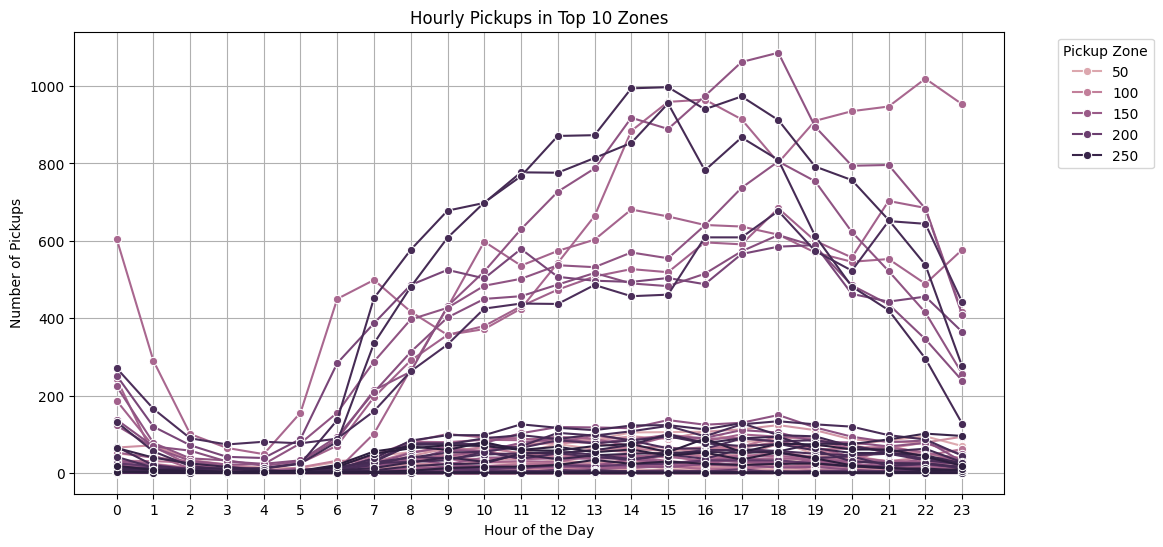

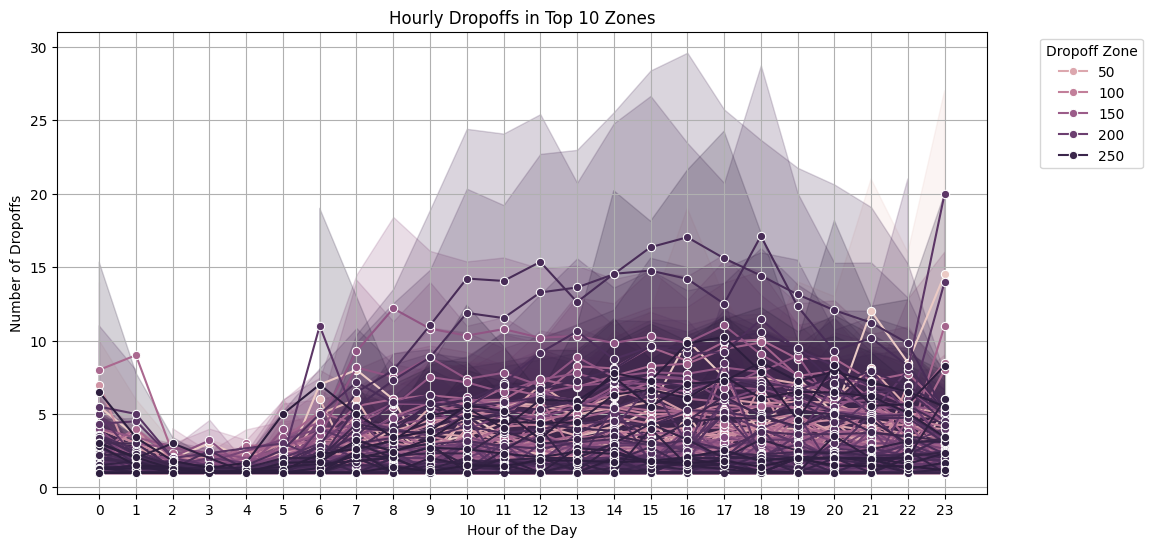

In [255]:
# Find top 10 pickup and dropoff zones
df4_pickups= df4.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
pickup_counts = df4_pickups.groupby(['PULocationID','zone']).size().reset_index(name='pickup_count')
top_10_pickup_zones = pickup_counts.nlargest(10, 'pickup_count')
print(top_10_pickup_zones)
top_10_pickup_zones_l =pickup_counts.nlargest(10, 'pickup_count')['PULocationID'].tolist()
#print("\n",top_10_pickup_zones_l)
df4_dropoff= df4.merge(zones, left_on="DOLocationID", right_on="LocationID", how="left")
dropoff_counts = df4_pickups.groupby(['DOLocationID','zone']).size().reset_index(name='dropoff_count')
top_10_droppoff_zones = dropoff_counts.nlargest(10, 'dropoff_count')
top_10_droppoff_zones_l= dropoff_counts.nlargest(10, 'dropoff_count')['DOLocationID'].tolist()
print(top_10_droppoff_zones)
#print("\n",top_10_droppoff_zones_l)


filtered_ = df4_pickups[(df4_pickups['PULocationID'].isin(top_10_pickup_zones_l)) | (df4_dropoff['DOLocationID'].isin(top_10_droppoff_zones_l))]
hourly_pickups = filtered_.groupby(['hour', 'PULocationID','zone']).size().reset_index(name='pickup_count')
hourly_dropoffs = filtered_.groupby(['hour', 'DOLocationID','zone']).size().reset_index(name='dropoff_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickups, x='hour', y='pickup_count', hue='PULocationID', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickups in Top 10 Zones')
plt.legend(title="Pickup Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_dropoffs, x='hour', y='dropoff_count', hue='DOLocationID', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoffs in Top 10 Zones')
plt.legend(title="Dropoff Zone", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))
plt.grid()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [326]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df4_pickups.groupby(['PULocationID','zone']).size().reset_index(name='pickup_count')
#print(pickup_counts)
dropoff_counts = df4_pickups.groupby(['DOLocationID','zone']).size().reset_index(name='dropoff_count')
zone_counts = pickup_counts.merge(dropoff_counts, left_on="zone", right_on="zone", how="outer").fillna(0)
#print(zone_counts)
#zone_counts["dropoff_count"] = zone_counts["dropoff_count"].replace(0, 1)
zone_counts["pickup_drop_ratio"] = zone_counts["pickup_count"] / zone_counts["dropoff_count"]

top_10_highest = zone_counts.nlargest(10, "pickup_drop_ratio")
top_10_lowest = zone_counts.nsmallest(10, "pickup_drop_ratio")

print("Top 20 Highest Pickup/Dropoff Ratios:")
print(top_10_highest[["zone", "pickup_count", "dropoff_count", "pickup_drop_ratio"]])

print("\nTop 20 Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest[["zone", "pickup_count", "dropoff_count", "pickup_drop_ratio"]])

Top 20 Highest Pickup/Dropoff Ratios:
             zone  pickup_count  dropoff_count  pickup_drop_ratio
3560  JFK Airport         14281              1            14281.0
3563  JFK Airport         14281              1            14281.0
3584  JFK Airport         14281              1            14281.0
3585  JFK Airport         14281              1            14281.0
3588  JFK Airport         14281              1            14281.0
3611  JFK Airport         14281              1            14281.0
3673  JFK Airport         14281              1            14281.0
3698  JFK Airport         14281              1            14281.0
3717  JFK Airport         14281              1            14281.0
3721  JFK Airport         14281              1            14281.0

Top 20 Lowest Pickup/Dropoff Ratios:
                           zone  pickup_count  dropoff_count  \
76      Arrochar/Fort Wadsworth             1              1   
123                Astoria Park             1              1   
340   

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [271]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df4_pickups_dropoff= df4.merge(zones, left_on="PULocationID", right_on="LocationID", how="left").rename(columns={"zone": "pickup_zone"})
df4_pickups_dropoff= df4_pickups_dropoff.merge(zones, left_on="DOLocationID", right_on="LocationID", how="left").rename(columns={"zone": "dropoff_zone"})
night_hours = df4_pickups_dropoff[(df4_pickups_dropoff['hour'] >= 23) | (df4_pickups_dropoff['hour'] <= 5)]
night_pickup_counts = night_hours.groupby("pickup_zone").size().reset_index(name="pickup_count")
night_dropoff_counts = night_hours.groupby("dropoff_zone").size().reset_index(name="dropoff_count")

top_10_night_pickups = night_pickup_counts.nlargest(10, "pickup_count")
top_10_night_dropoffs = night_dropoff_counts.nlargest(10, "dropoff_count")
print("Top 10 Pickup Zones (Night Hours):")
print(top_10_night_pickups)
print("\nTop 10 Dropoff Zones (Night Hours):")
print(top_10_night_dropoffs)

Top 10 Pickup Zones (Night Hours):
                      pickup_zone  pickup_count
50                   East Village          2259
77                    JFK Airport          2226
171                  West Village          1812
27                   Clinton East          1513
96                Lower East Side          1401
69        Greenwich Village South          1275
154     Times Sq/Theatre District          1201
121  Penn Station/Madison Sq West           978
107                 Midtown South           904
40                   East Chelsea           901

Top 10 Dropoff Zones (Night Hours):
                      dropoff_zone  dropoff_count
69                    East Village           1185
40                    Clinton East           1012
152                    Murray Hill            917
58                    East Chelsea            907
92                        Gramercy            830
123                Lenox Hill West            770
225                   West Village            735


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [272]:
# Filter for night hours (11 PM to 5 AM)
night_trip_time = df4_zones[(df4_zones['hour'] >= 23) | (df4_zones['hour'] <= 5)]
day_trip_time =df4_zones[(df4_zones['hour'] >= 5) & (df4_zones['hour'] < 23)]
nighttime_revenue = night_trip_time['fare_amount'].sum()
daytime_revenue = day_trip_time['fare_amount'].sum()
total_revenue = nighttime_revenue + daytime_revenue
night_trip_revenue_share = (nighttime_revenue / total_revenue) * 100
day_trip_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {night_trip_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_trip_revenue_share:.2f}%")

Nighttime Revenue Share: 12.06%
Daytime Revenue Share: 87.94%


it indicates a strong daytime  demand, all business men rush hour  commuting, airport trips, or business areas generate more revenue


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile  fare_per_mile_per_passenger
0              1.0      10.998151                    10.998151
1              2.0      13.174723                     6.587362
2              3.0      13.465041                     4.488347
3              4.0      16.758098                     4.189525
4              5.0       8.671566                     1.734313
5              6.0       8.023307                     1.337218


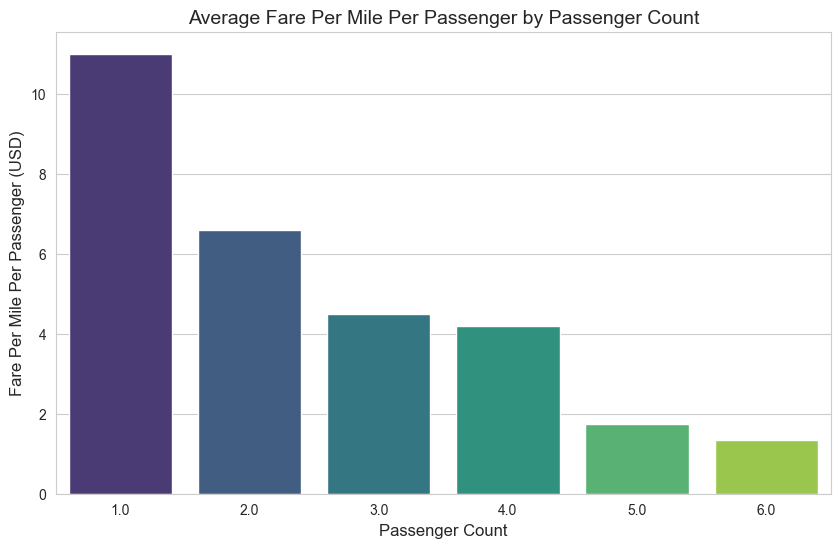

In [274]:
# Analyse the fare per mile per passenger for different passenger counts
df4_zones['fare_per_mile'] = df4_zones['fare_amount'] / df4_zones['trip_distance']
avg_fare_per_mile = df4_zones.groupby('passenger_count')['fare_per_mile'].mean().reset_index()
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile'] / avg_fare_per_mile['passenger_count']
print(avg_fare_per_mile)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_fare_per_mile, x="passenger_count", y="fare_per_mile_per_passenger", palette="viridis")
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Fare Per Mile Per Passenger (USD)", fontsize=12)
plt.title("Average Fare Per Mile Per Passenger by Passenger Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()

this cleary shows Higher passenger counts Lower fare per passenger (cost-sharing).
If fare per mile is high for low passenger counts, it might indicate shorter trips with minimum fare applied.
for single passenger price is high indicates no sharing 

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [276]:
df4_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport__Fee,week_Day,day_name,Month,Month_name,quarter_,trip_duration,Payment_type_name,day_type,fare_per_mile
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-11-07 06:50:58,2023-11-07 06:51:11,1.0,0.05,5.0,N,1.0,1.0,1.0,120.0,0.0,30.25,0.0,1.0,151.25,0.0,2023-11-07,6.0,0.0,1.0,Tuesday,11.0,NOV,4.0,0.216667,Credit Card,Weekday,2400.000000
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,2023-06-09 16:53:00,2023-06-09 16:59:43,1.0,19.90,5.0,N,1.0,1.0,1.0,130.0,0.0,26.20,0.0,1.0,157.20,0.0,2023-06-09,16.0,0.0,4.0,Friday,6.0,JUN,2.0,6.716667,Credit Card,Weekday,6.532663
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,2023-06-22 19:29:17,2023-06-22 19:29:37,1.0,4.40,1.0,N,1.0,1.0,1.0,109.0,0.0,22.00,0.0,1.0,132.00,0.0,2023-06-22,19.0,0.0,3.0,Thursday,6.0,JUN,2.0,0.333333,Credit Card,Weekday,24.772727
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-06-30 18:23:01,2023-06-30 18:23:13,1.0,0.01,5.0,N,1.0,1.0,1.0,20.0,0.0,0.00,0.0,1.0,21.00,0.0,2023-06-30,18.0,0.0,4.0,Friday,6.0,JUN,2.0,0.200000,Credit Card,Weekday,2000.000000
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-02-06 16:26:31,2023-02-06 16:26:38,1.0,0.06,5.0,N,1.0,1.0,1.0,21.5,0.0,4.50,0.0,1.0,27.00,0.0,2023-02-06,16.0,0.0,0.0,Monday,2.0,FEB,1.0,0.116667,Credit Card,Weekday,358.333333


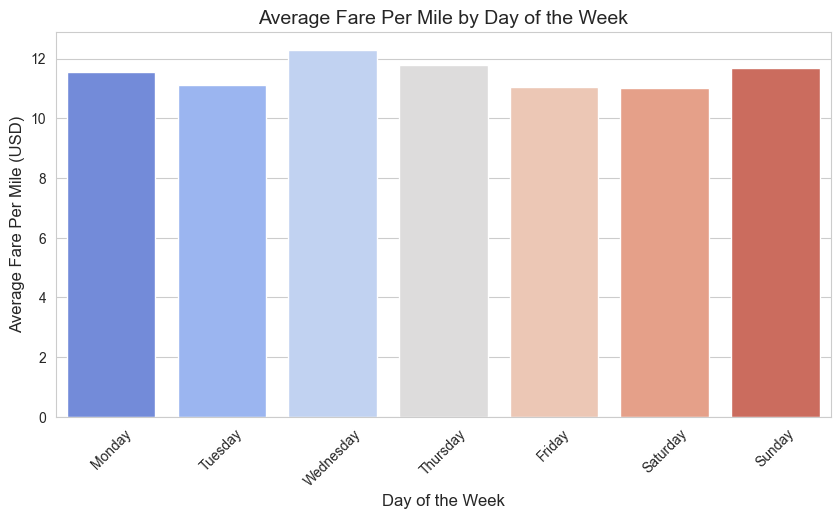

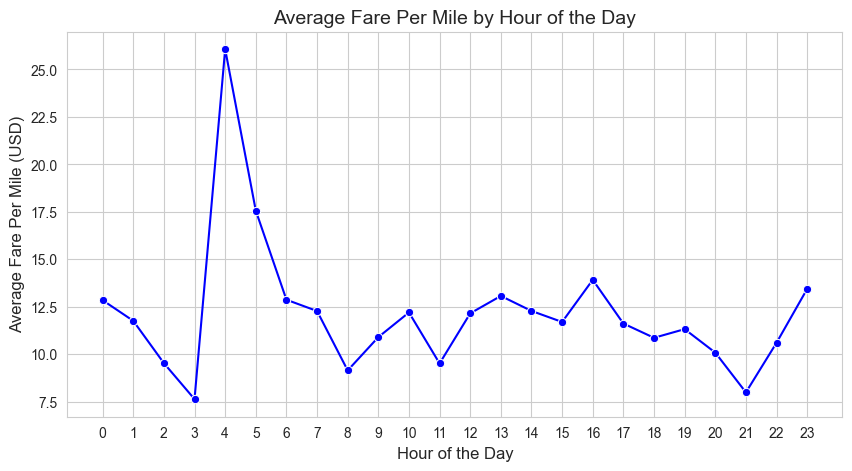

In [288]:
# Compare the average fare per mile for different days and for different times of the day
avg_fare_per_mile_by_day = df4_zones.groupby("week_Day")["fare_per_mile"].mean().reset_index()
avg_fare_per_mile_by_day["week_Day"]=avg_fare_per_mile_by_day["week_Day"].astype(int)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fare_per_mile_by_day["week_Day"] = avg_fare_per_mile_by_day["week_Day"].map(lambda x: days[x])
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_per_mile_by_day, x="week_Day", y="fare_per_mile", palette="coolwarm")

# Labels & Title
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Day of the Week", fontsize=14)
plt.xticks(rotation=45)


avg_fare_per_mile_by_hour =df4_zones.groupby("hour")["fare_per_mile"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_per_mile_by_hour, x="hour", y="fare_per_mile", marker="o", color="b")

# Labels & Title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Hour of the Day", fontsize=14)
plt.xticks(range(0, 24))

plt.show()

Higher fares per  mile is comstant through out the week days with slight up and and down , means a regular comuter strength 

Peak fare per mile in early morning (midnight - 4 AM) → Late-night trips may be more expensive.

Price is lower for peek hours indicate that  business strategy for more trips

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

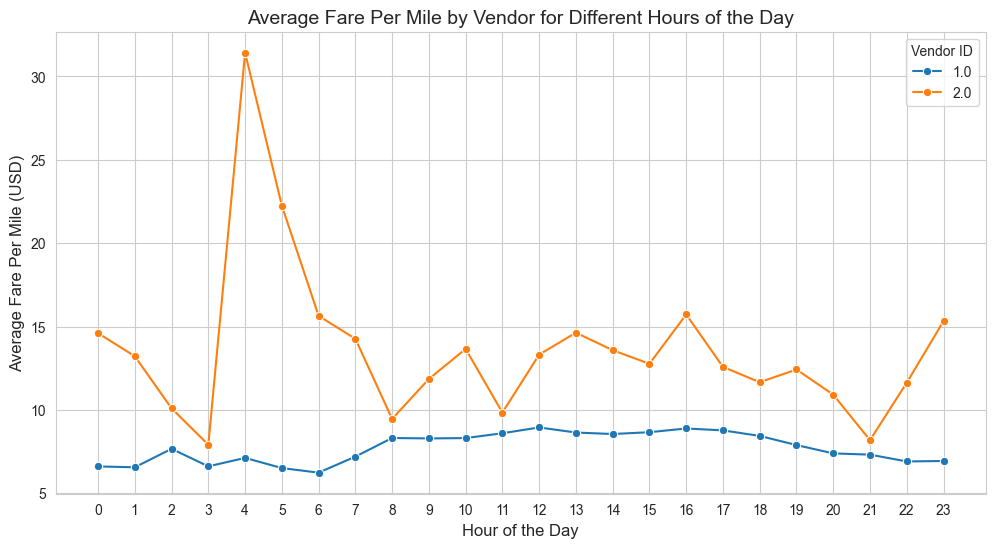

In [289]:
# Compare fare per mile for different vendors
avg_fare_per_mile_by_vendor = df4_zones.groupby(["VendorID", "hour"])["fare_per_mile"].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_fare_per_mile_by_vendor, x="hour", y="fare_per_mile", hue="VendorID", marker="o", palette="tab10")

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Vendor for Different Hours of the Day", fontsize=14)
plt.xticks(range(0, 24))

plt.legend(title="Vendor ID")

plt.show()

Vendor two is charging more for late night trips were as vendor is keeping stable pricing through out day and night
Vendor 1s pricing strategy need to be reconsidered  , vendor two is having good performance during peek hours as well.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


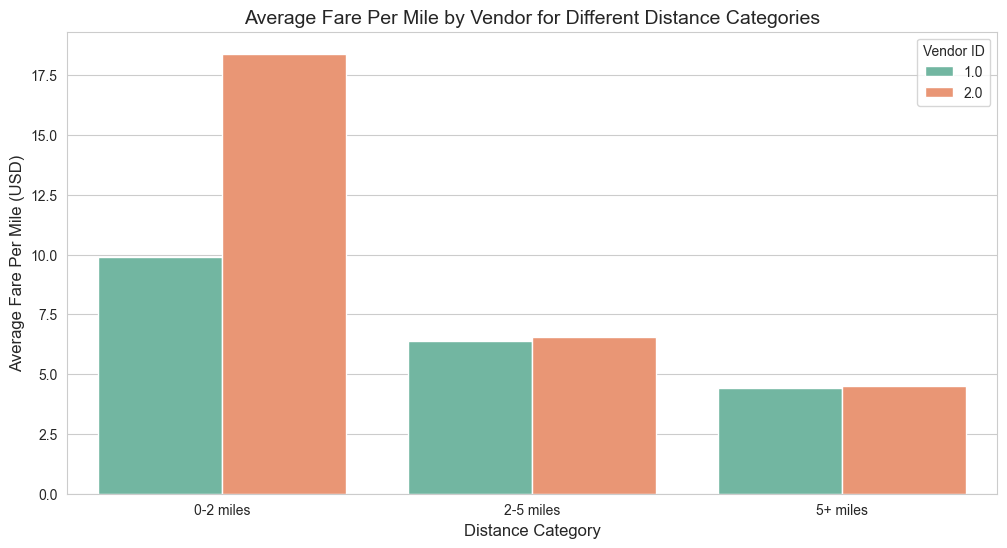

In [292]:
# Defining distance tiers
def distance_category(dist):
    if dist <= 2:
        return "0-2 miles"
    elif 2 < dist <= 5:
        return "2-5 miles"
    else:
        return "5+ miles"
df4_zones['distance_category'] = df4_zones['trip_distance'].apply(distance_category)
avg_fare_by_vendor = df4_zones.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_fare_by_vendor, x="distance_category", y="fare_per_mile", hue="VendorID", palette="Set2")
plt.xlabel("Distance Category", fontsize=12)
plt.ylabel("Average Fare Per Mile (USD)", fontsize=12)
plt.title("Average Fare Per Mile by Vendor for Different Distance Categories", fontsize=14)
plt.legend(title="Vendor ID")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [293]:
df4_zones.head(1)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport__Fee,week_Day,day_name,Month,Month_name,quarter_,trip_duration,Payment_type_name,day_type,fare_per_mile,distance_category
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-11-07 06:50:58,2023-11-07 06:51:11,1.0,0.05,5.0,N,1.0,1.0,1.0,120.0,0.0,30.25,0.0,1.0,151.25,0.0,2023-11-07,6.0,0.0,1.0,Tuesday,11.0,NOV,4.0,0.216667,Credit Card,Weekday,2400.0,0-2 miles


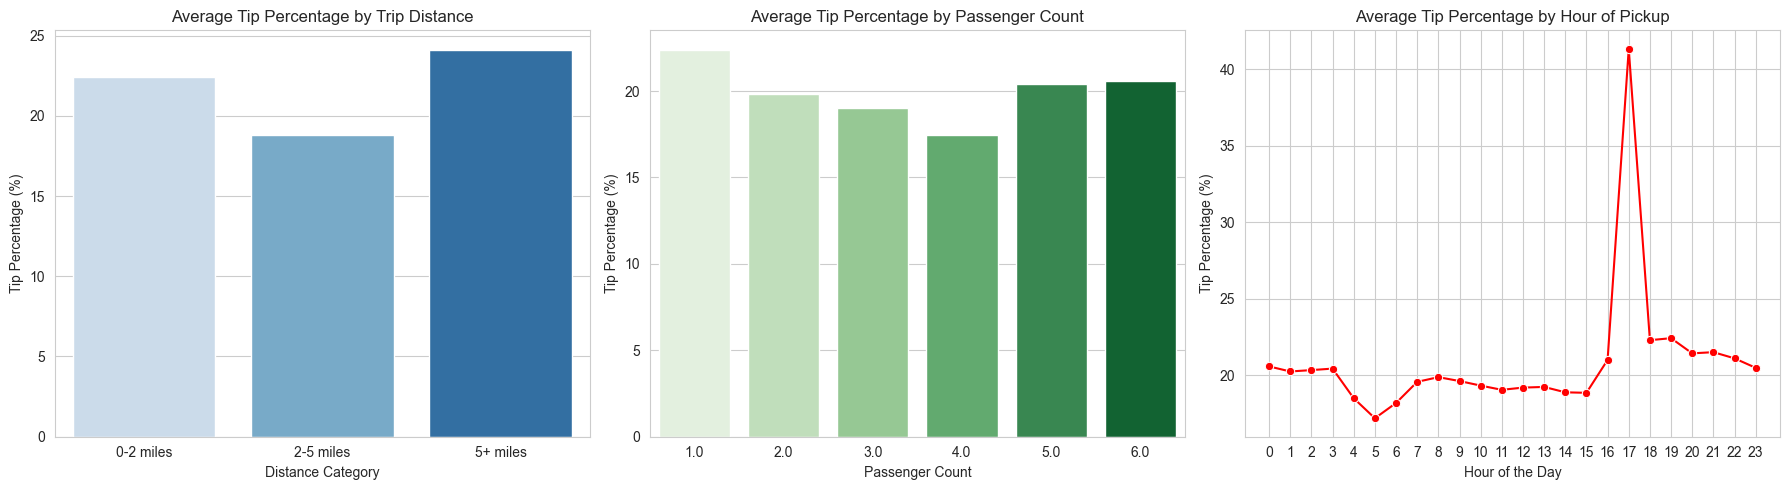

In [294]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df4_zones['tip_percentage'] = (df4_zones['tip_amount'] / df4_zones['fare_amount']) * 100
avg_tip_by_distance = df4_zones.groupby("distance_category")["tip_percentage"].mean().reset_index()
avg_tip_by_passenger = df4_zones.groupby("passenger_count")["tip_percentage"].mean().reset_index()
avg_tip_by_hour = df4_zones.groupby("hour")["tip_percentage"].mean().reset_index()
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=avg_tip_by_distance, x="distance_category", y="tip_percentage", palette="Blues", ax=axes[0])
axes[0].set_title("Average Tip Percentage by Trip Distance")
axes[0].set_xlabel("Distance Category")
axes[0].set_ylabel("Tip Percentage (%)")

sns.barplot(data=avg_tip_by_passenger, x="passenger_count", y="tip_percentage", palette="Greens", ax=axes[1])
axes[1].set_title("Average Tip Percentage by Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Tip Percentage (%)")

sns.lineplot(data=avg_tip_by_hour, x="hour", y="tip_percentage", marker="o", color="red", ax=axes[2])
axes[2].set_title("Average Tip Percentage by Hour of Pickup")
axes[2].set_xlabel("Hour of the Day")
axes[2].set_ylabel("Tip Percentage (%)")
axes[2].set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

More the distance more tip will be given 

if number of passengers are 1 or more than = 5 then the tip amount is increasing

also during rush hours of 4 - 6 pm  tip amount is high 

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [301]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tips = df4_zones[df4_zones['tip_percentage'] < 10]
high_tips = df4_zones[df4_zones['tip_percentage'] > 25]
avg_distance_low = low_tips['trip_distance'].mean()
avg_distance_high = high_tips['trip_distance'].mean()

print(f"Average Trip Distance - Low Tip (<10%): {avg_distance_low:.2f} miles")
print(f"Average Trip Distance - High Tip (>25%): {avg_distance_high:.2f} miles")

avg_fare_low = low_tips['fare_amount'].mean()
avg_fare_high = high_tips['fare_amount'].mean()

print(f"Average Fare Amount - Low Tip (<10%): ${avg_fare_low:.2f}")
print(f"Average Fare Amount - High Tip (>25%): ${avg_fare_high:.2f}")

avg_passengers_low = low_tips['passenger_count'].mean()
avg_passengers_high = high_tips['passenger_count'].mean()

print(f"Average Passenger Count - Low Tip (<10%): {round(avg_passengers_low)}")
print(f"Average Passenger Count - High Tip (>25%): {round(avg_passengers_high)}")

Average Trip Distance - Low Tip (<10%): 3.94 miles
Average Trip Distance - High Tip (>25%): 2.31 miles
Average Fare Amount - Low Tip (<10%): $21.63
Average Fare Amount - High Tip (>25%): $14.45
Average Passenger Count - Low Tip (<10%): 1
Average Passenger Count - High Tip (>25%): 1


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

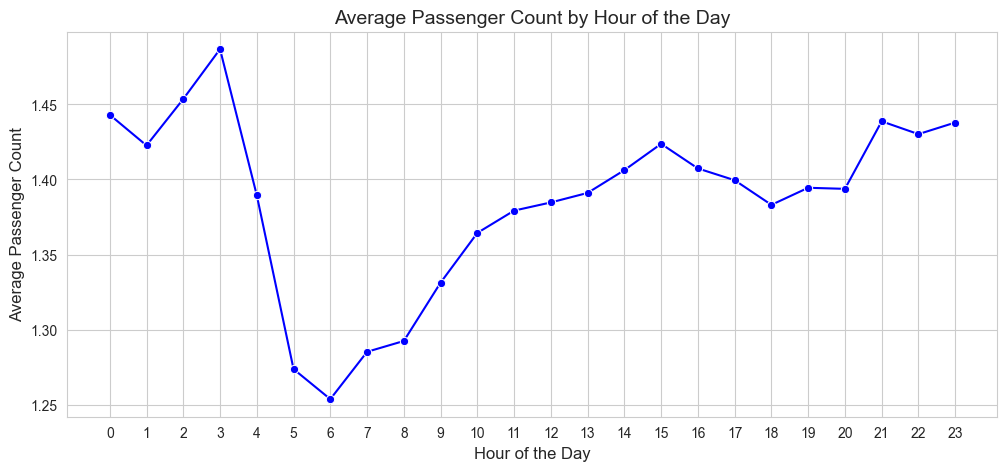

In [302]:
# See how passenger count varies across hours and days

avg_passengers_per_hour = df4_zones.groupby("hour")["passenger_count"].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_passengers_per_hour, x="hour", y="passenger_count", marker="o", color="blue")

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.title("Average Passenger Count by Hour of the Day", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


There is high number of passenger count in early morning -- may be returning after party or bar etc

then from 7am till 12 am there is continues increase 

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [304]:
df4_zones.head(1)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport__Fee,week_Day,day_name,Month,Month_name,quarter_,trip_duration,Payment_type_name,day_type,fare_per_mile,distance_category,tip_percentage
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-11-07 06:50:58,2023-11-07 06:51:11,1.0,0.05,5.0,N,1.0,1.0,1.0,120.0,0.0,30.25,0.0,1.0,151.25,0.0,2023-11-07,6.0,0.0,1.0,Tuesday,11.0,NOV,4.0,0.216667,Credit Card,Weekday,2400.0,0-2 miles,25.208333


     OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           ge

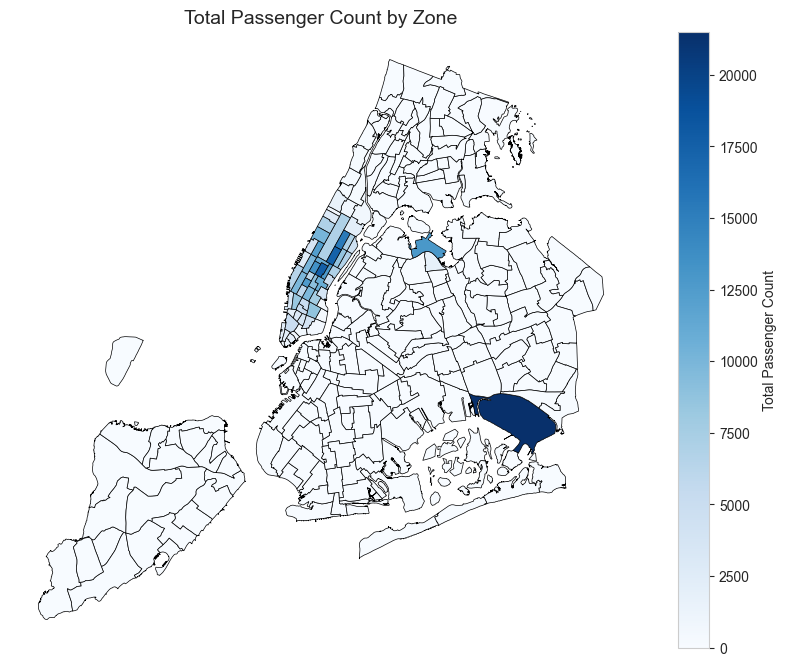

In [323]:
# How does passenger count vary across zones
passengers_by_zone = df4_zones.groupby("PULocationID")["passenger_count"].sum().reset_index()
zones_passengers = zones.merge(passengers_by_zone, left_on="LocationID", right_on="PULocationID", how="left")

zones_passengers["passenger_count"] = zones_passengers["passenger_count"].fillna(0)
print(zones_passengers)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_passengers.plot(column="passenger_count", cmap="Blues", linewidth=0.5, edgecolor="black", 
                      legend=True, legend_kwds={"label": "Total Passenger Count"}, ax=ax)

ax.set_title("Total Passenger Count by Zone", fontsize=14)
ax.axis("off")
plt.show()

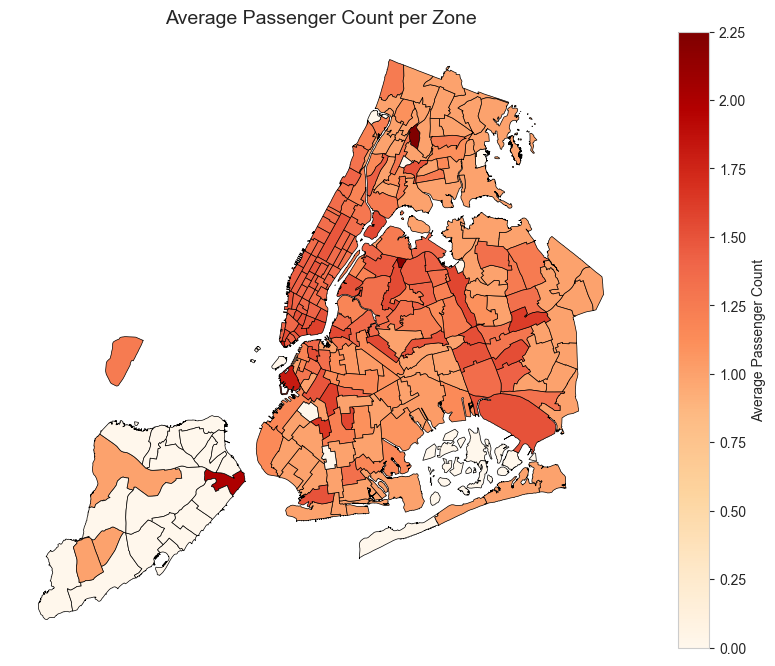

In [311]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passengers_by_zone = df4_zones.groupby("PULocationID")["passenger_count"].mean().reset_index()
zones_with_trips = zones.merge(avg_passengers_by_zone, left_on="LocationID", right_on="PULocationID", how="left")
zones_with_trips["avg_passenger_count"] = zones_with_trips["passenger_count"].fillna(0)
zones_with_trips = zones_with_trips.drop(columns=["passenger_count"])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones_with_trips.plot(column="avg_passenger_count", cmap="OrRd", linewidth=0.5, edgecolor="black",
                      legend=True, legend_kwds={"label": "Average Passenger Count"}, ax=ax)

ax.set_title("Average Passenger Count per Zone", fontsize=14)
ax.axis("off")

plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [313]:
df4_zones.head(1)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,Airport__Fee,week_Day,day_name,Month,Month_name,quarter_,trip_duration,Payment_type_name,day_type,fare_per_mile,distance_category,tip_percentage
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-11-07 06:50:58,2023-11-07 06:51:11,1.0,0.05,5.0,N,1.0,1.0,1.0,120.0,0.0,30.25,0.0,1.0,151.25,0.0,2023-11-07,6.0,0.0,1.0,Tuesday,11.0,NOV,4.0,0.216667,Credit Card,Weekday,2400.0,0-2 miles,25.208333


    total_extra_charge   count  percentage
0                 4.00  232296   87.845830
1                 5.75   10031    3.793356
2                 3.25    7504    2.837738
3                 1.50    7102    2.685716
4                 5.25    3197    1.208988
5                 2.75    2737    1.035033
6                 1.00    1134    0.428837
7                 3.50     229    0.086599
8                 3.30     107    0.040463
9                 2.25      43    0.016261
10                4.75       4    0.001513
11                3.60       4    0.001513
12                0.80       4    0.001513
13                0.00       3    0.001134
14                4.55       3    0.001134
15                2.05       3    0.001134
16                2.80       3    0.001134
17                5.05       2    0.000756
18                2.35       1    0.000378
19                2.55       1    0.000378


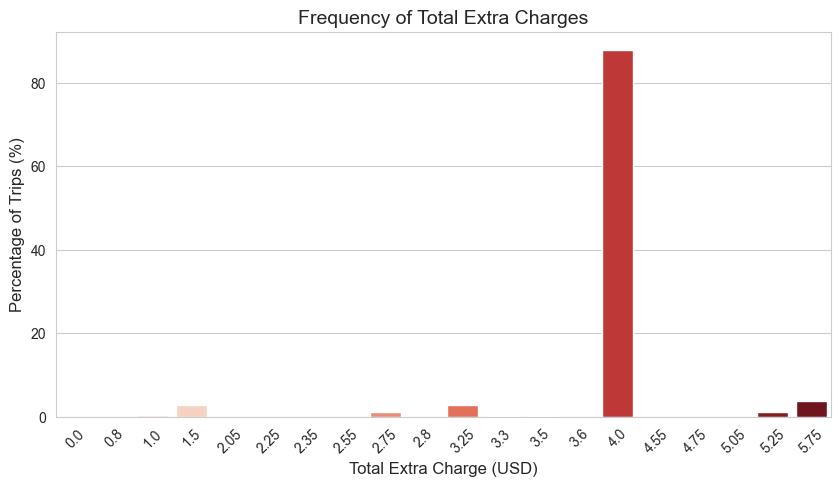

In [329]:
# How often is each surcharge applied?
df4_zones["total_extra"] = df4_zones["mta_tax"] + df4_zones["congestion_surcharge"] + df4_zones["Airport__Fee"] +df4_zones["improvement_surcharge"]
total_extra_counts = df4_zones["total_extra"].value_counts().reset_index()
total_extra_counts.columns = ["total_extra_charge", "count"]
total_extra_counts["total_extra_charge"]=total_extra_counts["total_extra_charge"].round(2)
total_extra_counts["percentage"] = (total_extra_counts["count"] / df4_zones.shape[0]) * 100
print(total_extra_counts)

plt.figure(figsize=(10, 5))
sns.barplot(data=total_extra_counts, x="total_extra_charge", y="percentage", palette="Reds")
plt.xlabel("Total Extra Charge (USD)", fontsize=12)
plt.ylabel("Percentage of Trips (%)", fontsize=12)
plt.title("Frequency of Total Extra Charges", fontsize=14)
plt.xticks(rotation=45)
plt.show()

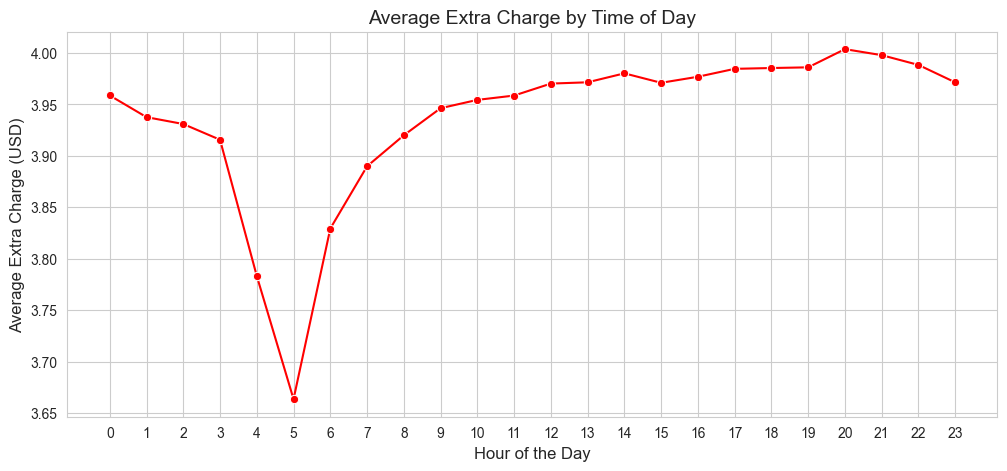

In [332]:
#lets check extra charge by hour
extra_charge_by_hour = df4_zones.groupby("hour")["total_extra"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=extra_charge_by_hour, x="hour", y="total_extra", marker="o", color="red")

# Labels & Title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Extra Charge (USD)", fontsize=12)
plt.title("Average Extra Charge by Time of Day", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Higher extra charges at night (08 PM - 11 pM) & peak hours (4-8 PM).
less extra charges  early morning 3am to 7am

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

	Strategic Cab Placement Near High-Pickup Zones
o	High-demand pickup spots: JFK Airport, Upper East Side, Midtown Center, Midtown East.
o	Cabs should be pre-positioned near these locations to reduce waiting times.
o	Use predictive dispatching to position more cabs before demanding spikes.
o	Increase cab availability at airports & business districts in peak hours.
	Dropoff-Based Cab Reallocation
o	Most drop-offs happen in East Village, Clinton East, Murray Hill East, Chelsea.
o	These areas have high rider availability, reducing cab downtime
o	Reduce cab dispatching to these areas (self-balancing effect).
o	Instead, allocate more cabs to pick up-dominant areas.
o	Encourage drivers to reposition themselves to pick up hotspots after drop-offs.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

	High Passenger Zones for Maximum Coverage
o	Position cabs near high-demand zones (IDs 263, 261, 262) before peak hours.
o	Deploy more cabs in bar/nightlife zones (early morning rush).
o	Increase cabs in business districts from 7 AM onward for commuter demand.
	Late-Night High Fare Per Mile Areas
o	Deploy more cabs in nightlife areas at night (bars, clubs, entertainment zones).
o	Reduce cab allocation in business districts after midnight (low demand).
o	Encourage late-night drivers by increasing surge pricing & incentives.
	Cab Distribution by Time of Day
o	Increase cab presence in residential areas before 7 AM (morning rush).
o	Maintain balanced distribution in business hubs during work hours.
o	Keep cabs available near transit hubs (subways, train stations) during rush hours
ripsse

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.